### Loading the Libraries

In [342]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols,logit
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
# from fancyimpute import MICE as MICE
from statsmodels.imputation.mice import MICE
from impyute.imputation.cs import mice

### Importing the  DataSet

In [8]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
data = pd.read_csv("OnlineNewsPopularity_Capstone.csv")
data.columns = data.columns.str.replace(" ", "")

### Reading the first 5 and the last 5 rows of the dataset

In [9]:
data.head()

url  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0            12.0             219.0         0.663594               1.0                  0.815385        4.0             2.0       1.0         0.0              4.680365           5.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                      496.0                      496.0                  496.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0             9.0             255.0         0.604743               1.0                  0.791946        3.0             1.0       1.0         0.0              4.913725           4.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                        0.0                        0.0                    0.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0             9.0             211.0         0.575130               1.0                  0.663866        3.0             1.0       1.0         0.0              4.393365           6.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0                      918.0                      918.0                  918.000000                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0             9.0             531.0         0.503788               

In [10]:
data.tail()

url  timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0            11.0             346.0         0.529052               1.0                  0.684783        9.0             7.0       1.0         1.0              4.523121           8.0                        0.0                            0.0                  0.0                     0.0                   1.0                    0.0        -1.0       671.0     173.125     26900.0    843300.0  374962.500000  2514.742857  4004.342857  3031.115764                    11400.0                    48000.0                37033.333333                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.025038  0.025001  0.151701  0.025000  0.773260             0.482679                   0.141964                    0.037572                    0.014451             0.722222             0.277778               0.333791               0.100000   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0            12.0             328.0         0.696296               1.0                  0.885057        9.0             7.0       3.0        48.0              4.405488           7.0                        0.0                            0.0                  0.0                     1.0                   0.0                    0.0        -1.0       616.0     184.000      6500.0    843300.0  192985.714286  1664.267857  5470.168651  3411.660830                     2100.0                     2100.0                 2100.000000                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.029349  0.028575  0.231866  0.681635  0.028575             0.564374                   0.194249                    0.039634                    0.009146             0.812500             0.187500               0.374825               0.136364   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0            10.0             442.0         0.516355               1.0                  0.644128       24.0             1.0      12.0         1.0              5.076923           8.0                        0.0                            0.0                  0.0                     0.0                   0.0                    0.0        -1.0       691.0     168.250      6200.0    843300.0  295850.000000  1753.882353  6880.687034  4206.439195                     1400.0                     1400.0                 1400.000000                0.0                 0.0                   1.0                  0.0                0.0                  0.0                0.0         0.0  0.159004  0.025025  0.025207  0.643794  0.146970             0.510296                   0.024609                    0.033937                    0.024887             0.576923             0.423077               0.307273               0.136364   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0             6.0          

### Displaying the information of the DataSet

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [12]:
data.shape

(39644, 61)

In [13]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

### Describing the Statistics of the Dataset

In [14]:
data.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs    num_videos  average_token_length  num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min     kw_min_max     kw_max_max     kw_avg_max    kw_min_avg     kw_max_avg    kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday    is_weekend        LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  \
count  39644.000000    39644.000000      39644.000000     39644.000000      39644.000000              39644.000000  39644.000000    39644.000000  39644.000000  39644.000000          39644.000000  39644.000000               39644.000000                   39644.000000         39644.000000            39644.000000          39644.000000           39644.000000  39644.000000   39644.000000  39644.000000   39644.000000   39644.000000   39644.000000  39644.000000   39644.000000  39644.000000               39644.000000               39644.000000                39644.000000       39644.000000        39644.000000          39644.000000         39644.000000       39644.000000         39644.000000       39644.000000  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000  39644.000000         39644.000000               39644.000000                39644.000000                39644.000000         39644.000000         39644.000000           39644.000000           39644.000000   
mean     354.530471       10.398749        546.514731         0.548216          0.996469                  0.689175     10.883690        3.293638      4.544143      1.249874              4.548239      7.223767                   0.052946                       0.178009             0.157855                0.058597              0.185299               0.212567     26.106801    1153.951682    312.366967   13612.354102  752324.066694  259281.938083   1117.146610    5657.211151   3135.858639                3998.755396               10329.212662                 6401.697580           0.168020            0.186409              0.187544             0.183306           0.143805             0.061876           0.069039      0.130915      0.184599      0.141256      0.216321      0.223770      0.234029             0.443370                   0.119309                    0.039625                    0.016612             0.682150             0.287934               0.353825               0.095446   
std      214.163767        2.114037        471.107508         3.520708          5.231231                  3.264816     11.332017        3.855141      8.309434      4.107855              0.844406      1.909130                   0.223929                       0.382525             0.364610                0.234871              0.388545               0.409129     69.633215    3857.990877    620.783887   57986.029357  214502.129573  135102.247285   1137.456951    6098.871957   1318.150397               19738.670516               41027.576613                24211.332231           0.373889            0.389441              0.390353             0.386922           0.350896             0.240933           0.253524      0.337312      0.262975      0.219707      0.282145      0.295191      0.289183             0.116685                   0.096931                    0.017429                    0.010828             0.190206             0.156156               0.104542               0.071315   
min        8.000000        2.000000          0.000

### Checking Null Values in the DataSet

In [15]:
data.isnull().sum().sum()

0

### Quartiles and Inter Quartile Range

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 4.314000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max                       7

### Converting Outliers to Null Values

In [17]:
new_data = data.copy()

In [18]:
new_data.shape

(39644, 61)

In [19]:
new_data.drop([],inplace=True,axis=1)

In [20]:
column = new_data.columns

In [21]:
new_data.drop(["url",'timedelta','data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares'],inplace=True,axis=1)

In [22]:
def out_null(column):
        IQR=column.quantile(0.75)-column.quantile(0.25)
        UL=column.quantile(0.75)+1.5*IQR
        LL=column.quantile(0.25)-1.5*IQR
        column.where(column.between(LL,UL),np.nan,inplace=True)

In [23]:
for i in new_data.columns:
    out_null(new_data[i])

In [24]:
new_data.isnull().sum()

n_tokens_title                 156
n_tokens_content              1933
n_unique_tokens               1604
n_non_stop_words              2827
n_non_stop_unique_tokens      1733
num_hrefs                     2169
num_self_hrefs                2090
num_imgs                      7703
num_videos                    2946
average_token_length          1681
num_keywords                    51
kw_min_min                    4677
kw_max_min                    3661
kw_avg_min                    2081
kw_min_max                    5063
kw_max_max                    9440
kw_avg_max                     960
kw_min_avg                       0
kw_max_avg                    2391
kw_avg_avg                    1629
self_reference_min_shares     4976
self_reference_max_shares     4183
self_reference_avg_sharess    4209
dtype: int64

In [25]:
new_data.head(15)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  self_reference_max_shares  self_reference_avg_sharess
0             12.0             219.0         0.663594               1.0                  0.815385        4.0             2.0       1.0         0.0              4.680365           5.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      496.0                      496.0                  496.000000
1              9.0             255.0         0.604743               1.0                  0.791946        3.0             1.0       1.0         0.0              4.913725           4.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
2              9.0             211.0         0.575130               1.0                  0.663866        3.0             1.0       1.0         0.0              4.393365           6.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      918.0                      918.0                  918.000000
3              9.0             531.0         0.503788               1.0                  0.665635        9.0             0.0       1.0         0.0              4.404896           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
4             13.0            1072.0         0.415646               1.0                  0.540890       19.0             NaN       NaN         0.0              4.682836           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
5             10.0             370.0         0.559889               1.0                  0.698198        2.0             2.0       0.0         0.0              4.359459           9.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        NaN                     8500.0                 8500.000000
6              8.0             960.0         0.418163               1.0                  0.549834       21.0             NaN       NaN         0.0              4.654167          10.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
7             12.0             989.0         0.433574               1.0                  0.572108       20.0             NaN       NaN         0.0              4.617796           9.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                      545.0                    16000.0                 3151.157895
8             11.0              97.0         0.670103               NaN                  0.836735        2.0             0.0       0.0         0.0              4.855670           7.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0         0.0         NaN                        0.0                        0.0                    0.000000
9             10.0             231.0         0.636364               1.0                  0.797101        4.0             1.0       1.0         1.0              5.090909           5.0         0.0         0.0         0.0         0.0         NaN         0.0         0.0        

In [26]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

In [27]:
data.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',],axis=1,inplace=True)

### Outliers Present in the target column (Shares)

In [198]:
data["shares"].

-1835.0

### Percentage of Null Values in the whole dataset and in each column and in each row

In [28]:
# Percentage of Null Values in the whole dataset
(new_data.isnull().sum().sum()/2418284)*100

2.818651572768128

In [29]:
# Percentage of Null Values in each column
(new_data.isnull().sum()/len(new_data))*100

n_tokens_title                 0.393502
n_tokens_content               4.875895
n_unique_tokens                4.046009
n_non_stop_words               7.130966
n_non_stop_unique_tokens       4.371406
num_hrefs                      5.471194
num_self_hrefs                 5.271920
num_imgs                      19.430431
num_videos                     7.431137
average_token_length           4.240238
num_keywords                   0.128645
kw_min_min                    11.797498
kw_max_min                     9.234689
kw_avg_min                     5.249218
kw_min_max                    12.771163
kw_max_max                    23.811926
kw_avg_max                     2.421552
kw_min_avg                     0.000000
kw_max_avg                     6.031177
kw_avg_avg                     4.109071
self_reference_min_shares     12.551710
self_reference_max_shares     10.551408
self_reference_avg_sharess    10.616991
dtype: float64

In [193]:
# Percentage of Null Values in each row
(new_data.isnull().sum(axis=1)/len(new_data))

0        0.000050
1        0.000050
2        0.000050
3        0.000050
4        0.000101
5        0.000076
6        0.000101
7        0.000101
8        0.000076
9        0.000050
10       0.000050
11       0.000050
12       0.000126
13       0.000126
14       0.000076
15       0.000050
16       0.000101
17       0.000076
18       0.000076
19       0.000101
20       0.000101
21       0.000050
22       0.000101
23       0.000101
24       0.000050
25       0.000050
26       0.000050
27       0.000101
28       0.000050
29       0.000050
           ...   
39614    0.000000
39615    0.000126
39616    0.000101
39617    0.000025
39618    0.000025
39619    0.000000
39620    0.000000
39621    0.000101
39622    0.000000
39623    0.000000
39624    0.000000
39625    0.000025
39626    0.000050
39627    0.000000
39628    0.000000
39629    0.000050
39630    0.000000
39631    0.000025
39632    0.000000
39633    0.000000
39634    0.000050
39635    0.000025
39636    0.000076
39637    0.000050
39638    0

### Joined Data

In [38]:
df = data.join(new_data)
df.head()

url  timedelta  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000                    0.7              -0.350000                 -0.600              -0.200000            0.500000                 -0.187500                0.000000                      0.187500     593            12.0             219.0         0.663594               1.0                  0.815385        4.0             2.0       1.0         0.0              4.680365           5.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333                    0.7              -0.118750                 -0.125              -0.100000            0.000000                  0.000000                0.500000                      0.000000     711             9.0             255.0         0.604743               1.0                  0.791946        3.0             1.0       1.0         0.0              4.913725           4.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000                    1.0              -0.466667                 -0.800              -0.133333            0.000000                  0.000000                0.500000                      0.000000    1500             9.0             211.0         0.575130               1.0                  0.663866        3.0             1.0       1.0         0.0              4.393365           6.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0                        0.

In [37]:
df.isnull().sum().sum()

68163

### Number of datapoints exceeding LL and UL in each columns

In [200]:
UL=data.quantile(0.75)+1.5*IQR
LL=data.quantile(0.25)-1.5*IQR

In [342]:
print("Lower Limit Count")
print("")
print("")
print(LL.count())
print("")
print("")
print("Upper Limit Count")
print("")
print("")
print(UL.count())

Lower Limit Count


url                                 0
timedelta                           0
n_tokens_title                     34
n_tokens_content                    0
n_unique_tokens                  1308
n_non_stop_words                 2826
n_non_stop_unique_tokens         1591
num_hrefs                           0
num_self_hrefs                      0
num_imgs                            0
num_videos                          0
average_token_length             1236
num_keywords                       51
data_channel_is_lifestyle           0
data_channel_is_entertainment       0
data_channel_is_bus                 0
data_channel_is_socmed              0
data_channel_is_tech                0
data_channel_is_world               0
kw_min_min                          0
kw_max_min                          0
kw_avg_min                          0
kw_min_max                          0
kw_max_max                       9440
kw_avg_max                          0
kw_min_avg                    

### Exploratory Data Analysis

#### Univariate Analysis

For Numerical Columns - We create Histogram (Distplot | Seaborn)

For Categorical Columns - Barplot | Countplot

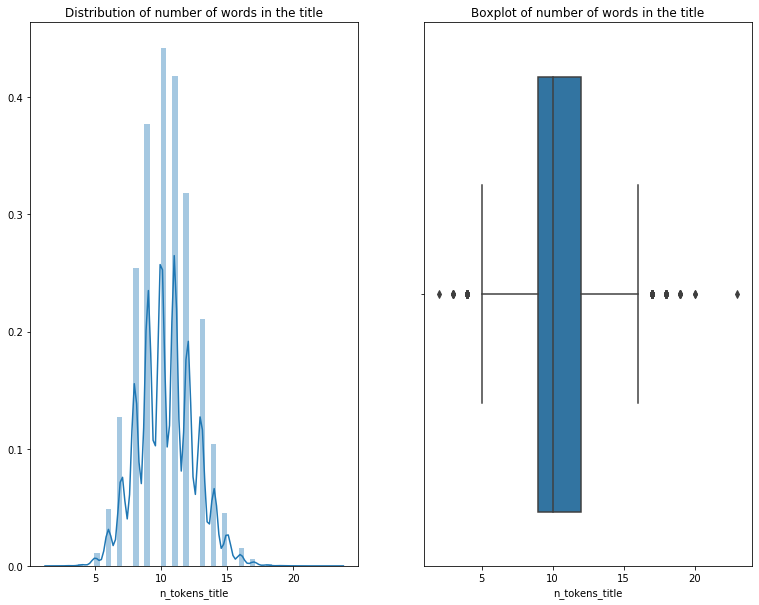

In [163]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_tokens_title)
plt.title("Distribution of number of words in the title")
plt.subplot(132)
sns.boxplot(data.n_tokens_title)
plt.title("Boxplot of number of words in the title")
plt.show()

In [316]:
LL = data[data<(Q1-1.5*IQR)]
UL = data[data>(Q3+1.5*IQR)]

In [307]:
data.skew()

timedelta                          0.120504
n_tokens_title                     0.165320
n_tokens_content                   2.945422
n_unique_tokens                  198.655116
n_non_stop_words                 198.792445
n_non_stop_unique_tokens         198.443294
num_hrefs                          4.013495
num_self_hrefs                     5.172751
num_imgs                           3.946596
num_videos                         7.019533
average_token_length              -4.576012
num_keywords                      -0.147251
data_channel_is_lifestyle          3.993019
data_channel_is_entertainment      1.683585
data_channel_is_bus                1.876870
data_channel_is_socmed             3.758880
data_channel_is_tech               1.619976
data_channel_is_world              1.405169
kw_min_min                         2.374947
kw_max_min                        35.328434
kw_avg_min                        31.306108
kw_min_max                        10.386372
kw_max_max                      

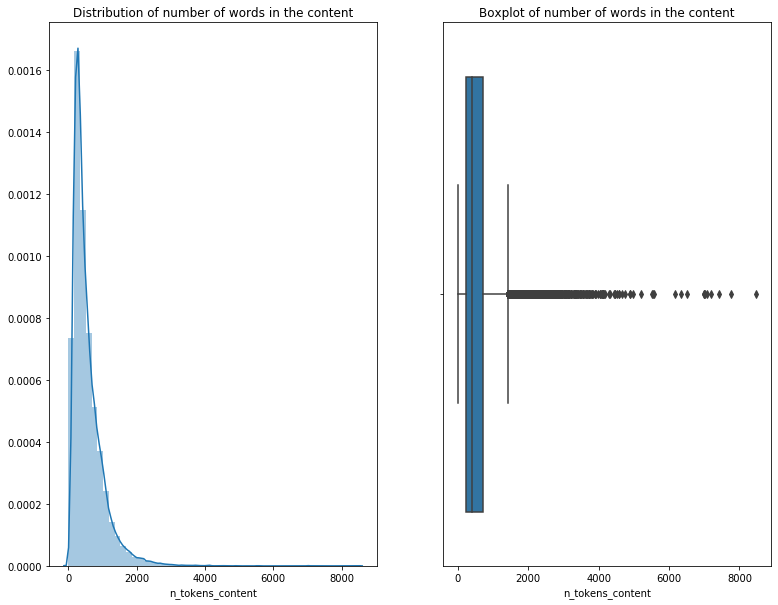

In [164]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(data.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

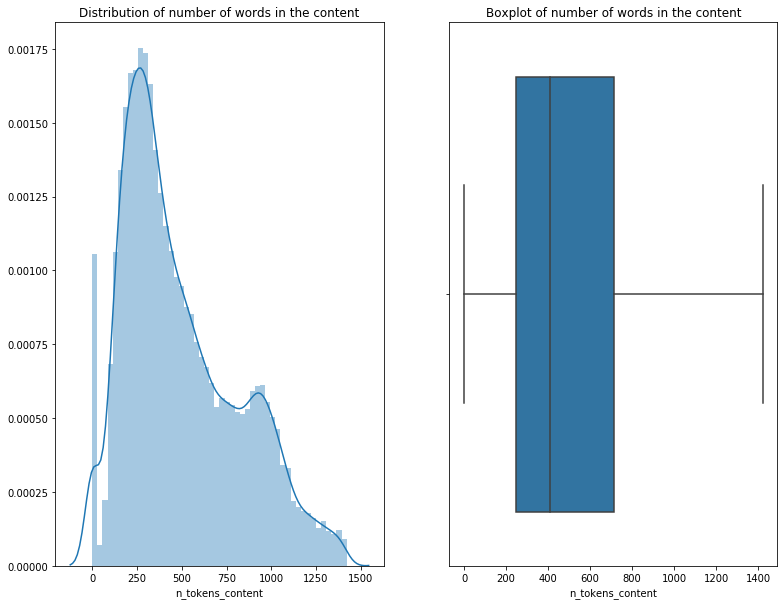

In [192]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(df.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

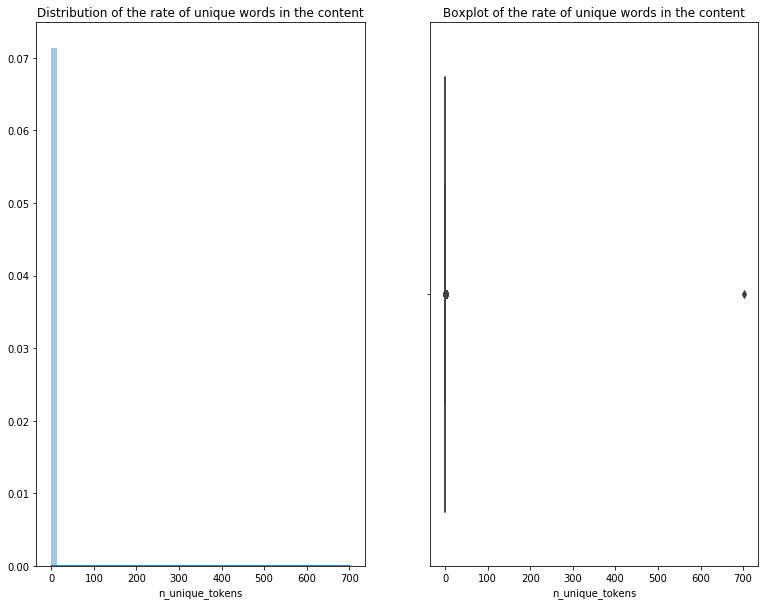

In [165]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_unique_tokens)
plt.title("Distribution of the rate of unique words in the content")
plt.subplot(132)
sns.boxplot(data.n_unique_tokens)
plt.title("Boxplot of the rate of unique words in the content")
plt.show()

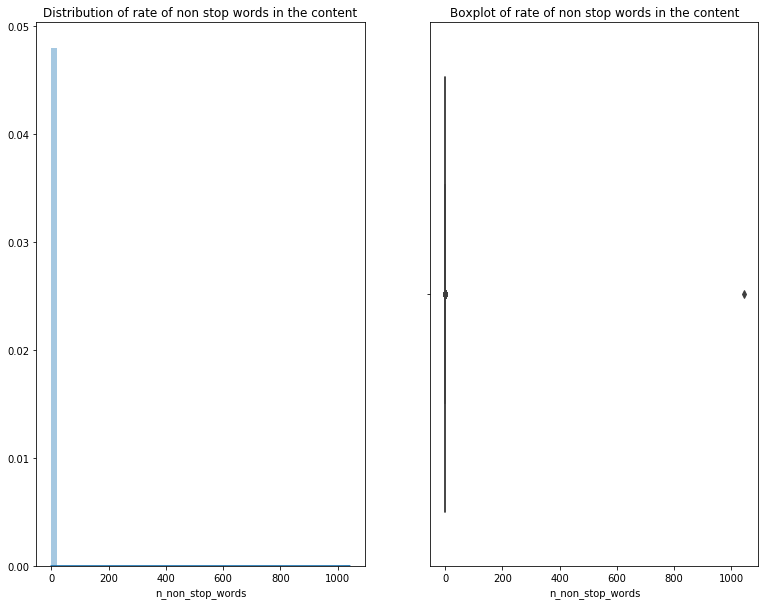

In [166]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_non_stop_words)
plt.title("Distribution of rate of non stop words in the content")
plt.subplot(132)
sns.boxplot(data.n_non_stop_words)
plt.title("Boxplot of rate of non stop words in the content")
plt.show()

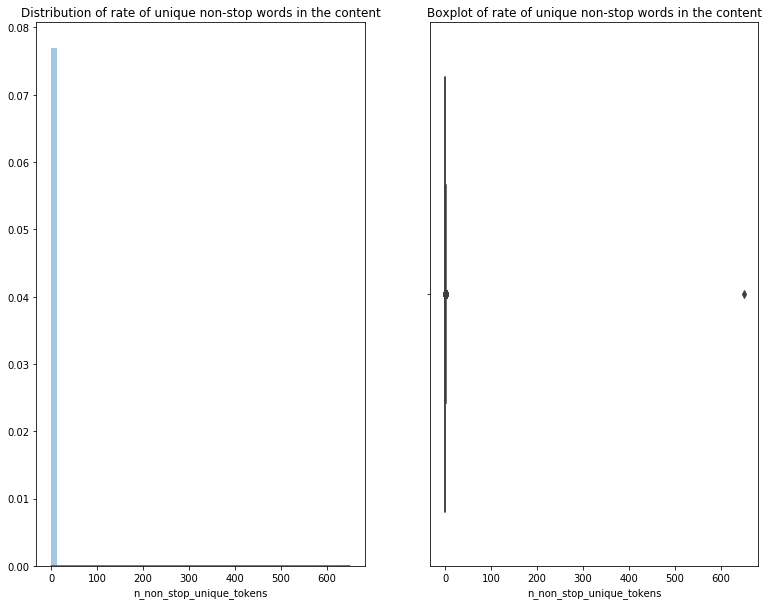

In [167]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_non_stop_unique_tokens)
plt.title("Distribution of rate of unique non-stop words in the content")
plt.subplot(132)
sns.boxplot(data.n_non_stop_unique_tokens)
plt.title("Boxplot of rate of unique non-stop words in the content")
plt.show()

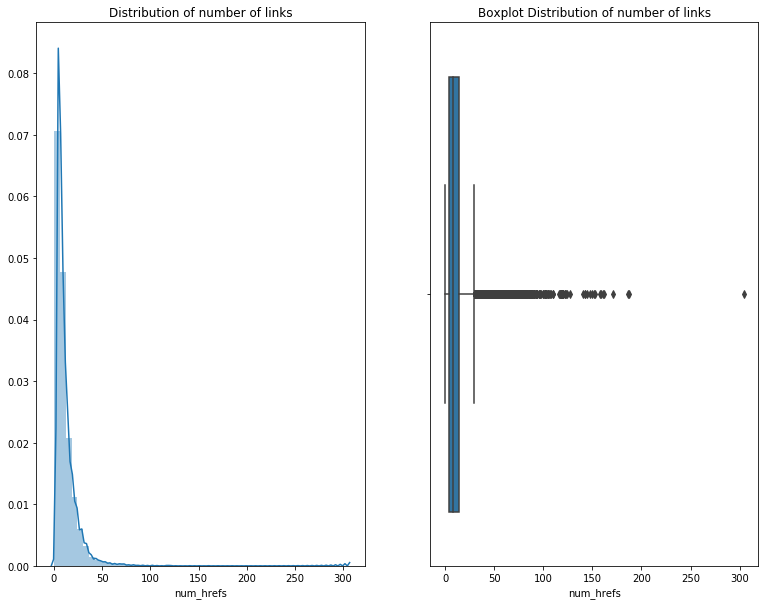

In [168]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_hrefs)
plt.title("Distribution of number of links")
plt.subplot(132)
sns.boxplot(data.num_hrefs)
plt.title("Boxplot Distribution of number of links")
plt.show()

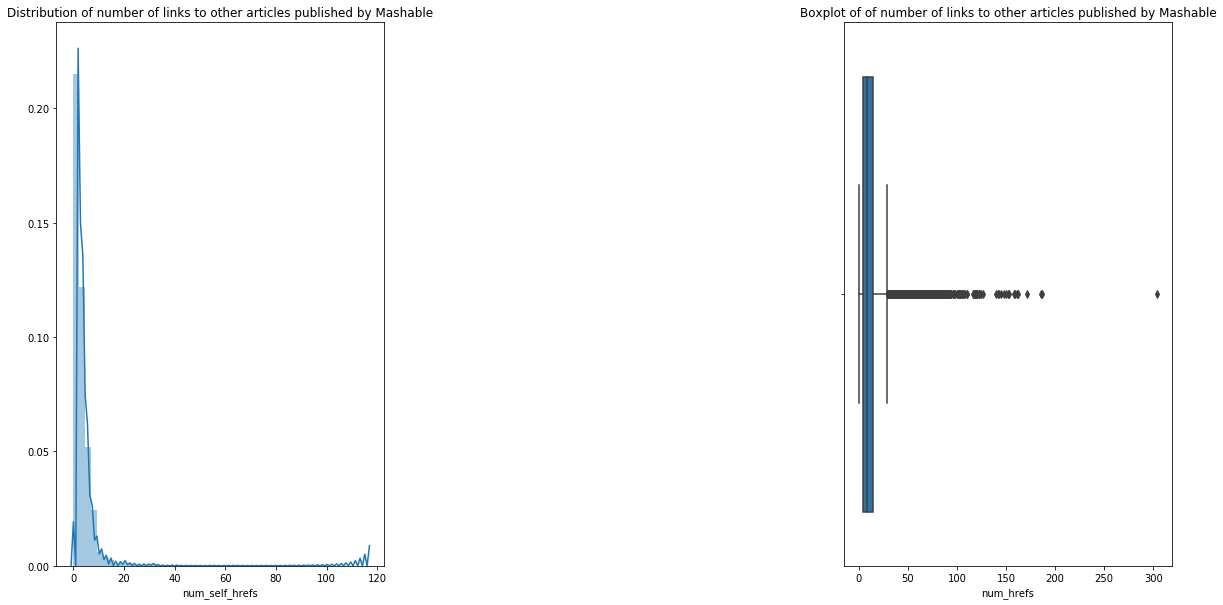

In [171]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_self_hrefs)
plt.title("Distribution of number of links to other articles published by Mashable")
plt.subplot(133)
sns.boxplot(data.num_hrefs)
plt.title("Boxplot of of number of links to other articles published by Mashable")
plt.show()

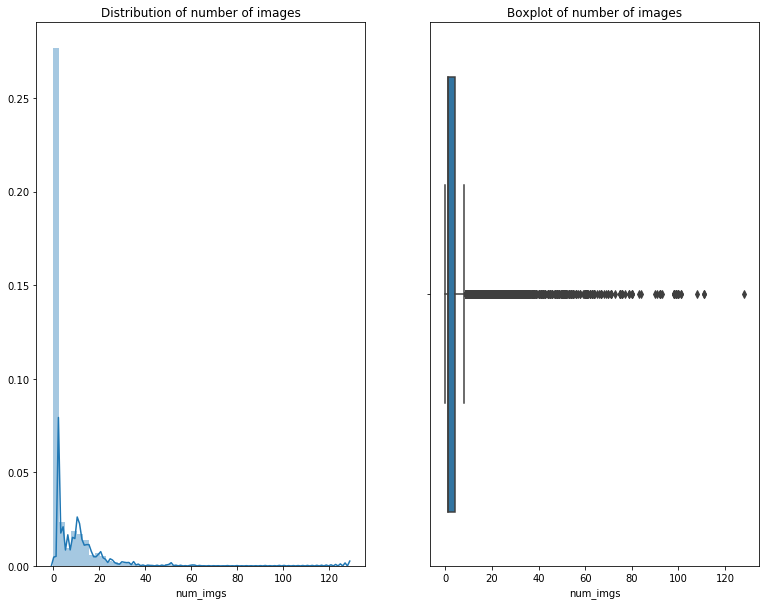

In [174]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_imgs)
plt.title("Distribution of number of images")
plt.subplot(132)
sns.boxplot(data.num_imgs)
plt.title("Boxplot of number of images")
plt.show()

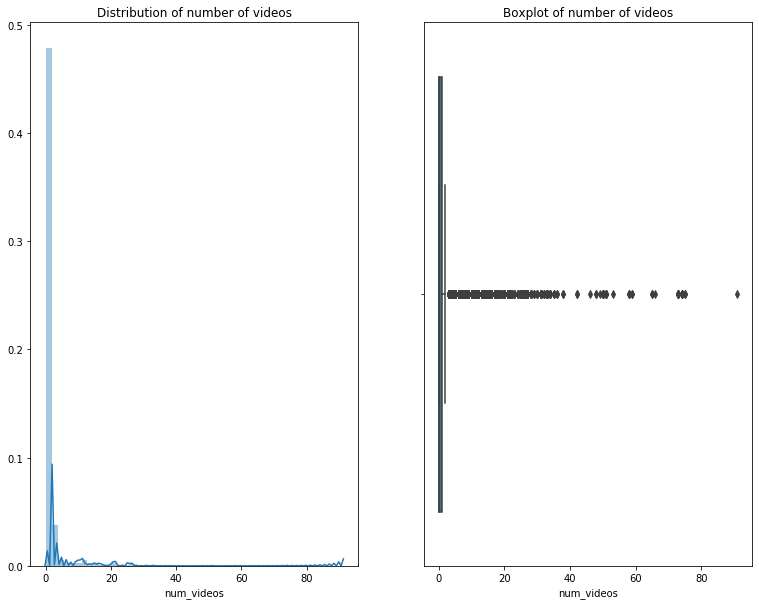

In [175]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_videos)
plt.title("Distribution of number of videos")
plt.subplot(132)
sns.boxplot(data.num_videos)
plt.title("Boxplot of number of videos")
plt.show()

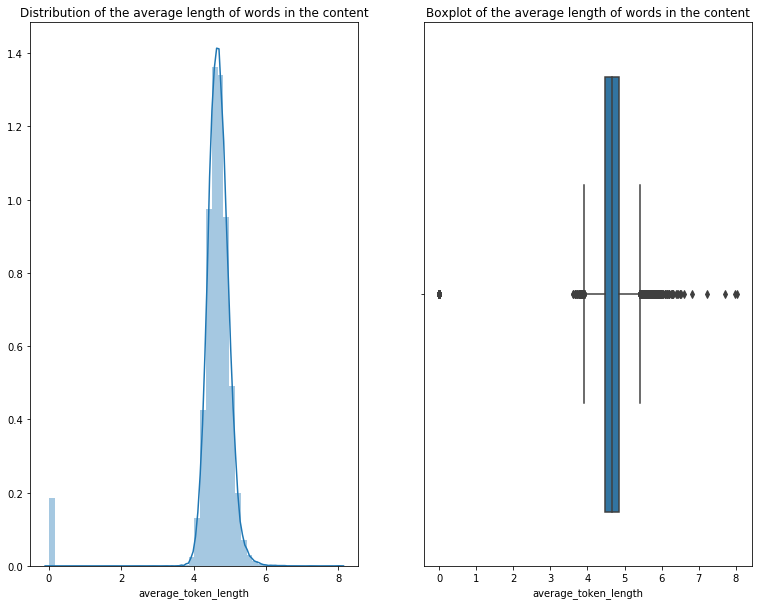

In [177]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.average_token_length)
plt.title("Distribution of the average length of words in the content")
plt.subplot(132)
sns.boxplot(data.average_token_length)
plt.title("Boxplot of the average length of words in the content")
plt.show()

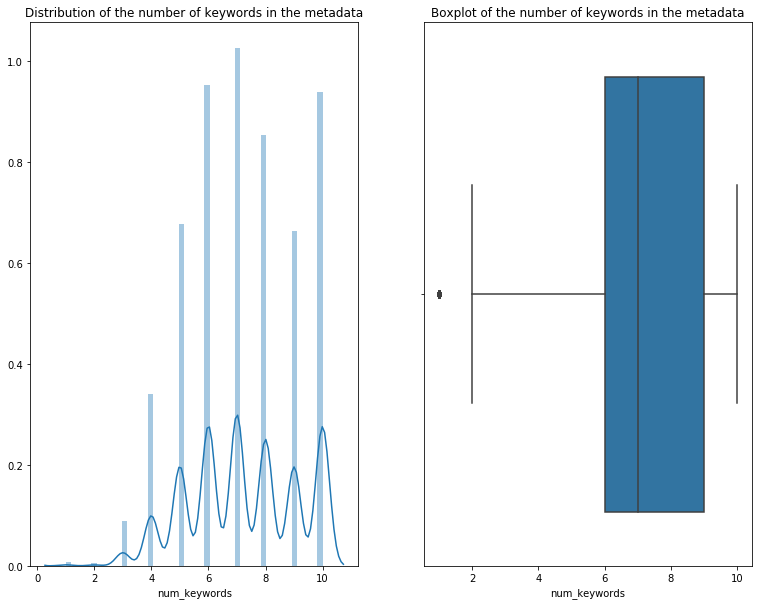

In [178]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_keywords)
plt.title("Distribution of the number of keywords in the metadata")
plt.subplot(132)
sns.boxplot(data.num_keywords)
plt.title("Boxplot of the number of keywords in the metadata")
plt.show()

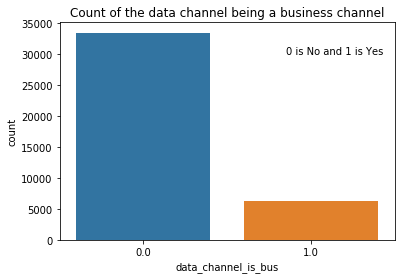

In [75]:
sns.countplot(data.data_channel_is_bus)
plt.title("Count of the data channel being a business channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

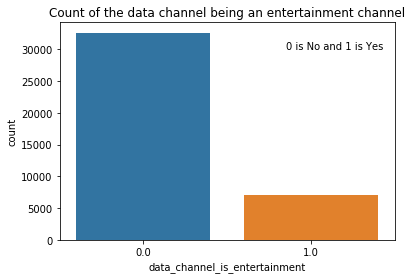

In [76]:
sns.countplot(data.data_channel_is_entertainment)
plt.title("Count of the data channel being an entertainment channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

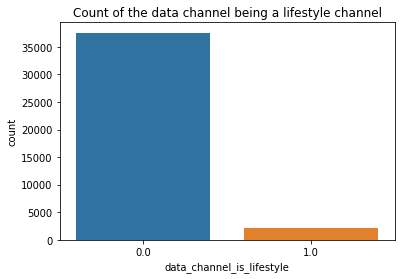

In [77]:
sns.countplot(data.data_channel_is_lifestyle)
plt.title("Count of the data channel being a lifestyle channel")
plt.show()

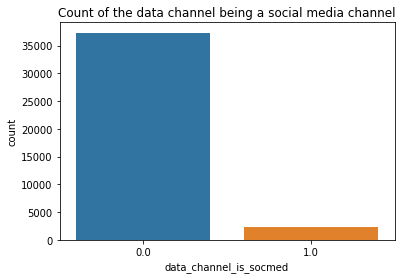

In [78]:
sns.countplot(data.data_channel_is_socmed)
plt.title("Count of the data channel being a social media channel")
plt.show()

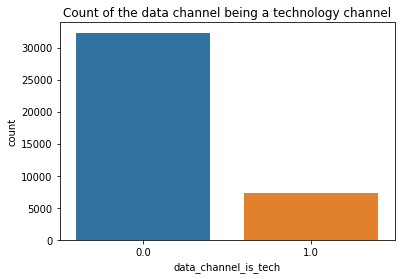

In [79]:
sns.countplot(data.data_channel_is_tech)
plt.title("Count of the data channel being a technology channel")
plt.show()

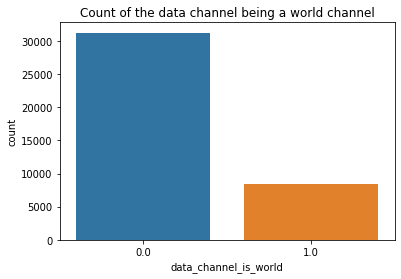

In [80]:
sns.countplot(data.data_channel_is_world)
plt.title("Count of the data channel being a world channel")
plt.show()

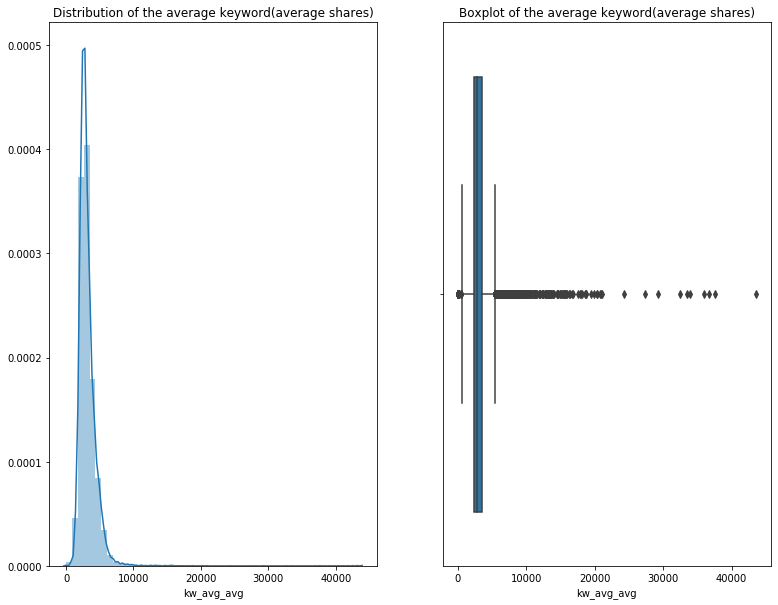

In [179]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_avg)
plt.title("Distribution of the average keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_avg)
plt.title("Boxplot of the average keyword(average shares)")
plt.show()

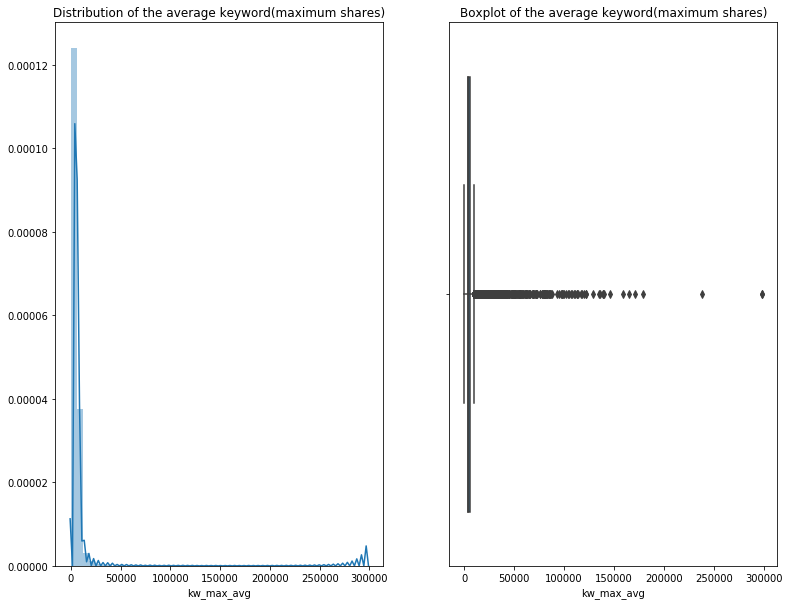

In [180]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_avg)
plt.title("Distribution of the average keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_avg)
plt.title("Boxplot of the average keyword(maximum shares)")
plt.show()

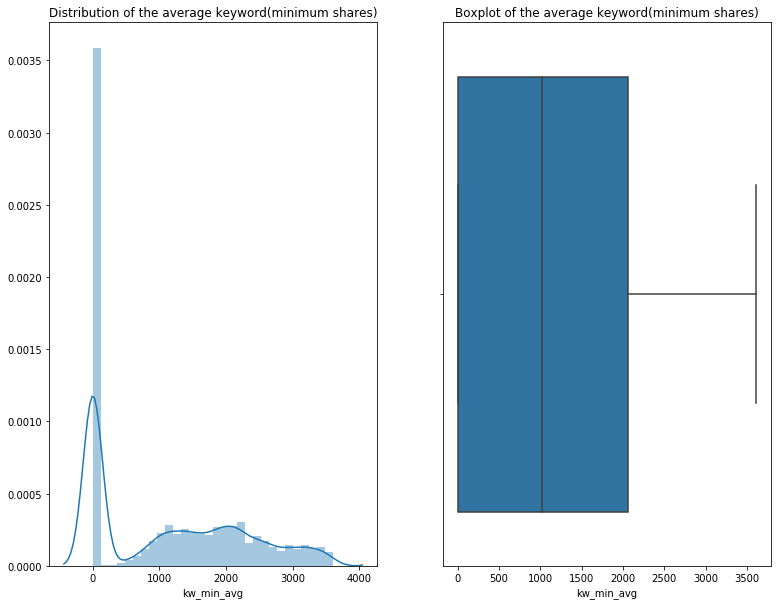

In [181]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_avg)
plt.title("Distribution of the average keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_avg)
plt.title("Boxplot of the average keyword(minimum shares)")
plt.show()

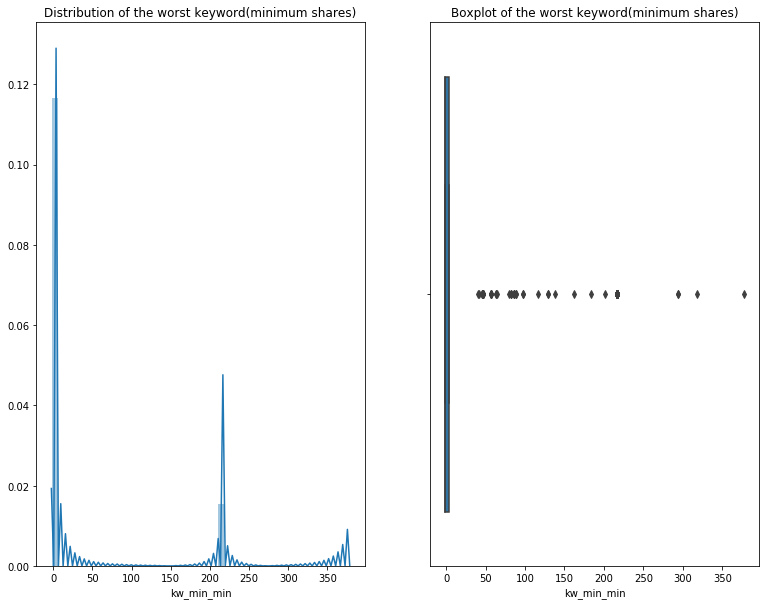

In [182]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_min)
plt.title("Distribution of the worst keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_min)
plt.title("Boxplot of the worst keyword(minimum shares)")
plt.show()

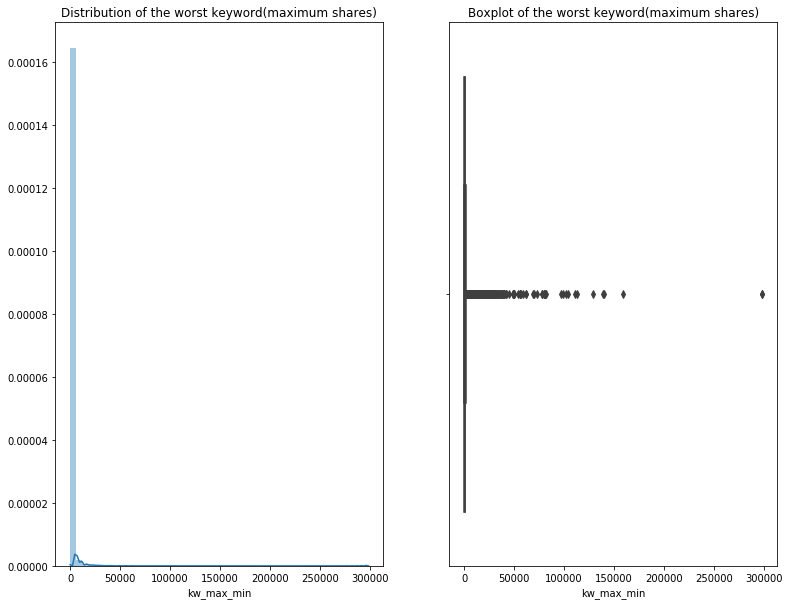

In [183]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_min)
plt.title("Distribution of the worst keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_min)
plt.title("Boxplot of the worst keyword(maximum shares)")
plt.show()

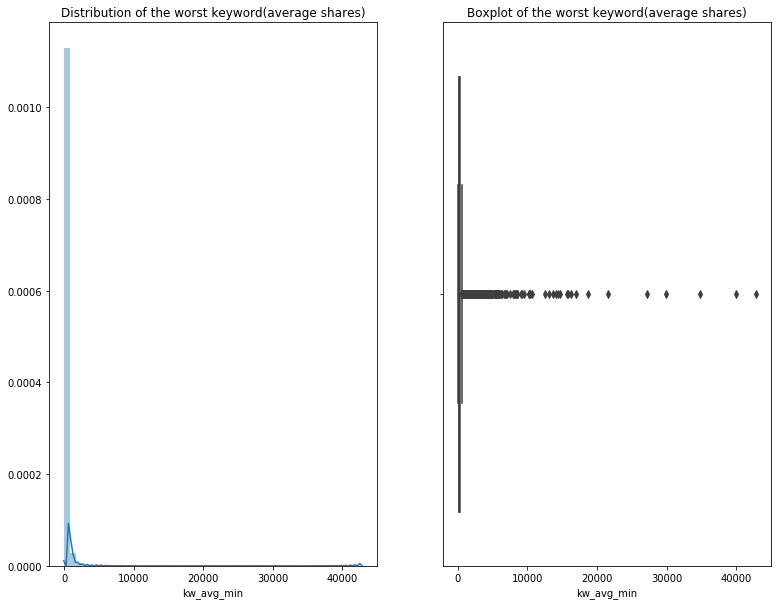

In [184]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_min)
plt.title("Distribution of the worst keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_min)
plt.title("Boxplot of the worst keyword(average shares)")
plt.show()

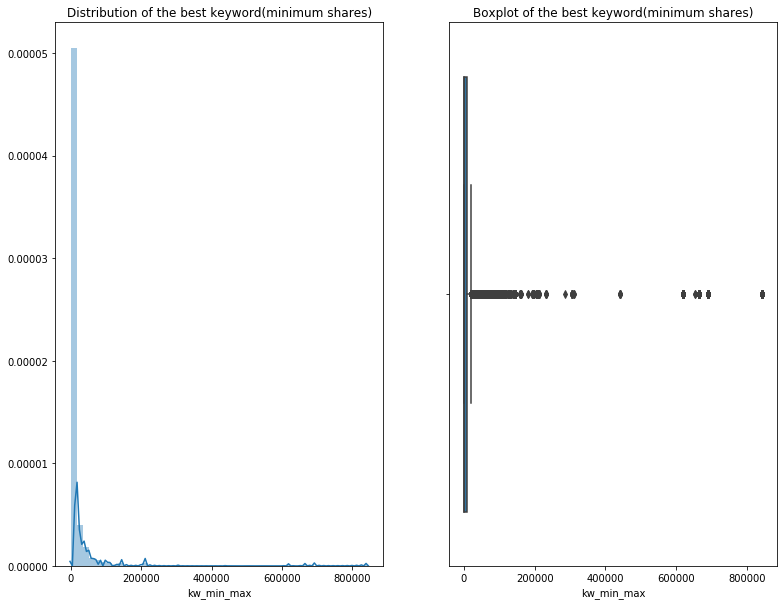

In [185]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_max)
plt.title("Distribution of the best keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_max)
plt.title("Boxplot of the best keyword(minimum shares)")
plt.show()

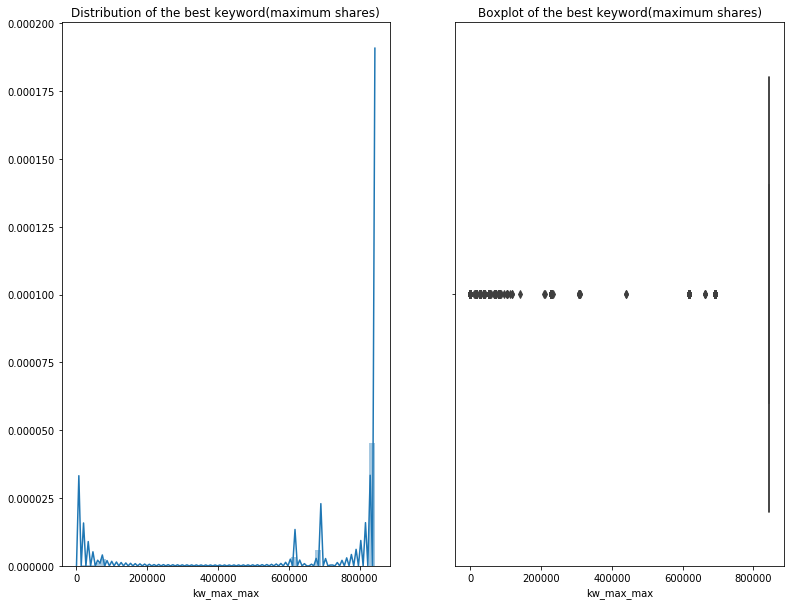

In [186]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_max)
plt.title("Distribution of the best keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_max)
plt.title("Boxplot of the best keyword(maximum shares)")
plt.show()

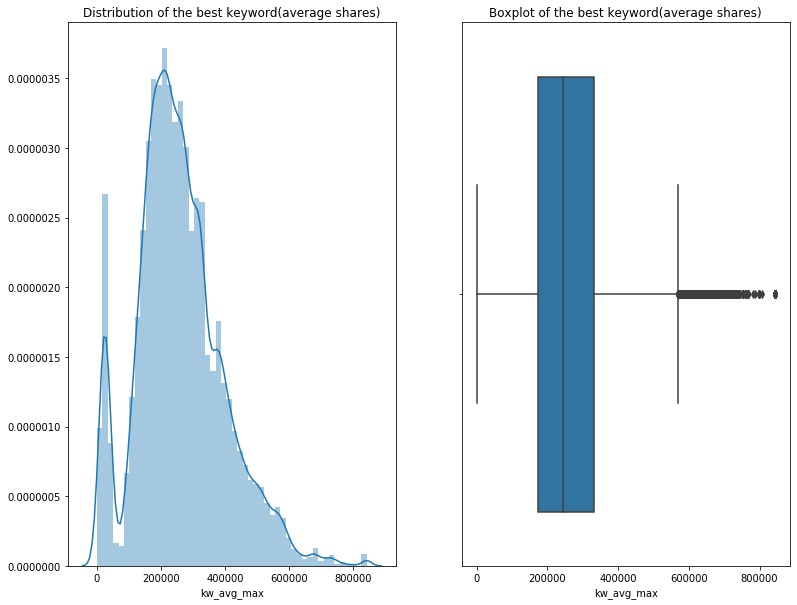

In [187]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_max)
plt.title("Distribution of the best keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_max)
plt.title("Boxplot of the best keyword(average shares)")
plt.show()

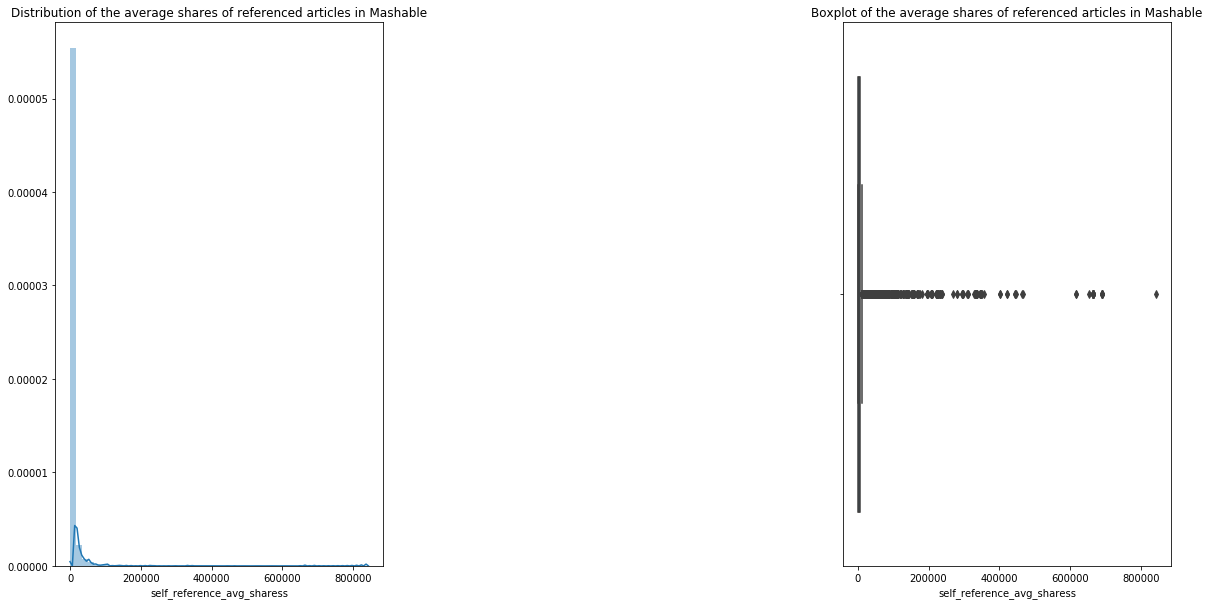

In [189]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_avg_sharess)
plt.title("Distribution of the average shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_avg_sharess)
plt.title("Boxplot of the average shares of referenced articles in Mashable")
plt.show()

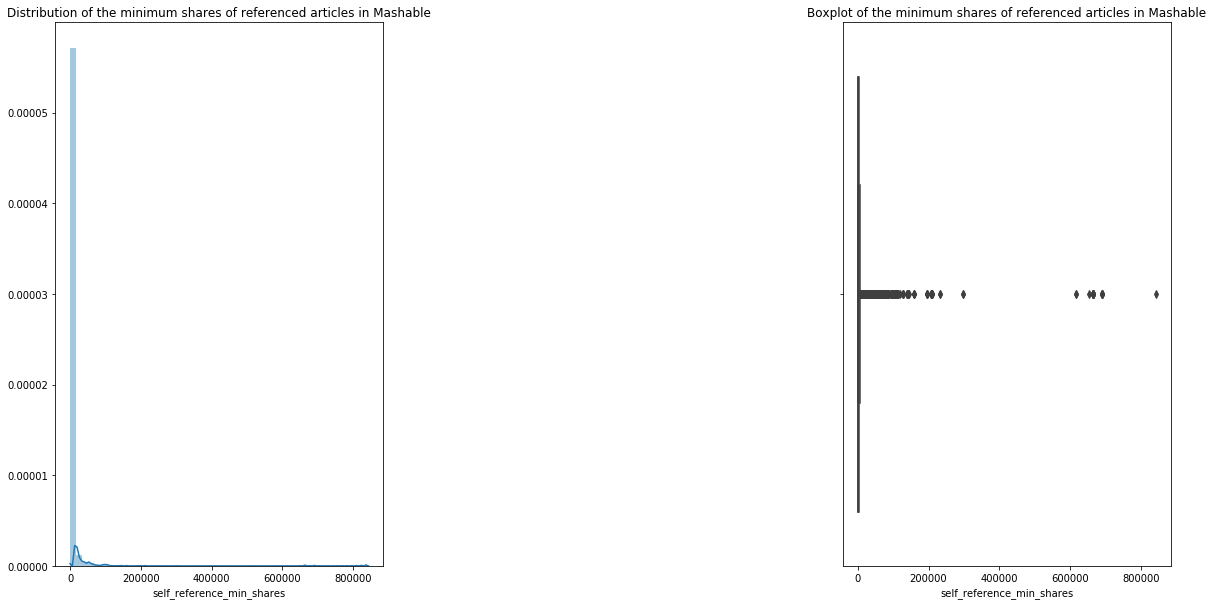

In [190]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_min_shares)
plt.title("Distribution of the minimum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_min_shares)
plt.title("Boxplot of the minimum shares of referenced articles in Mashable")
plt.show()

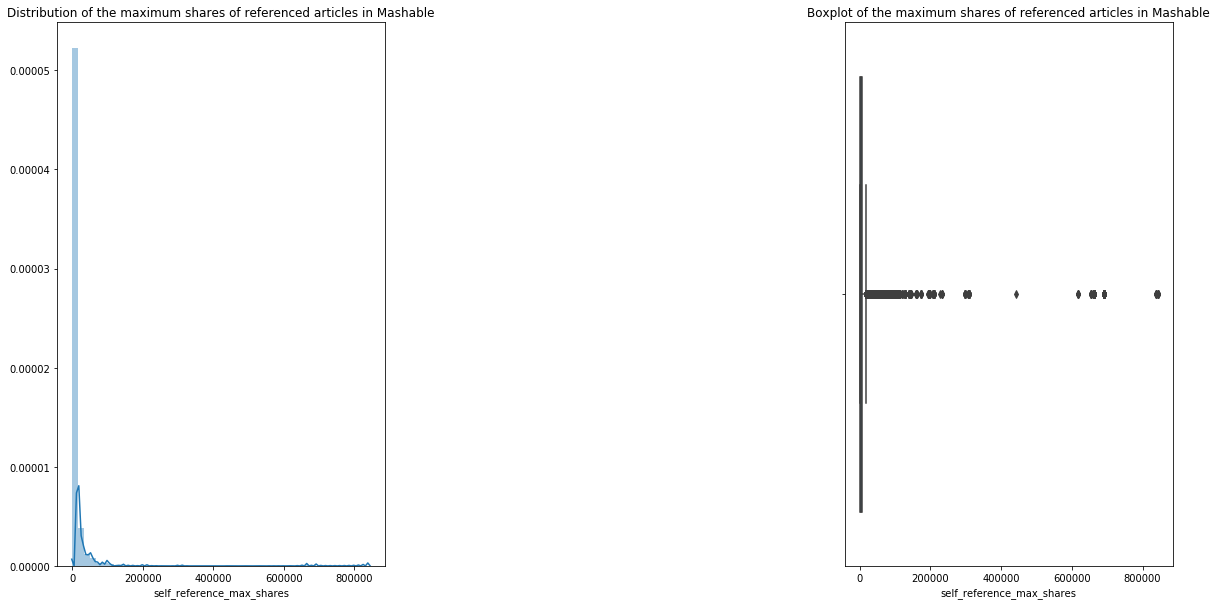

In [191]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_max_shares)
plt.title("Distribution of the maximum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_max_shares)
plt.title("Boxplot of the maximum shares of referenced articles in Mashable")
plt.show()

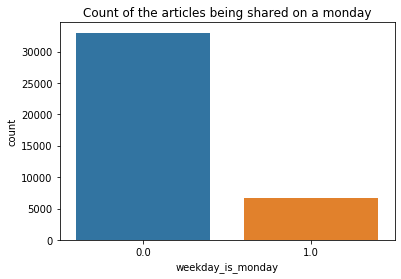

In [93]:
sns.countplot(data.weekday_is_monday)
plt.title("Count of the articles being shared on a monday")
plt.show()

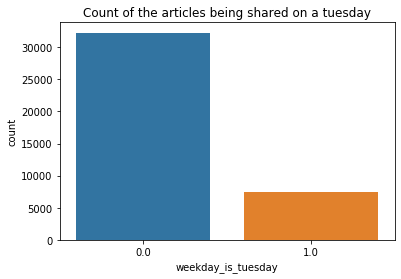

In [94]:
sns.countplot(data.weekday_is_tuesday)
plt.title("Count of the articles being shared on a tuesday")
plt.show()

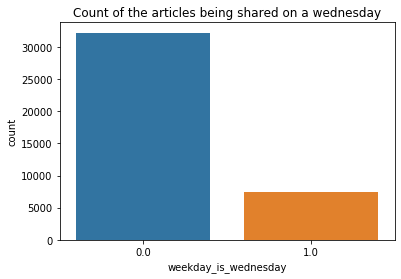

In [95]:
sns.countplot(data.weekday_is_wednesday)
plt.title("Count of the articles being shared on a wednesday")
plt.show()

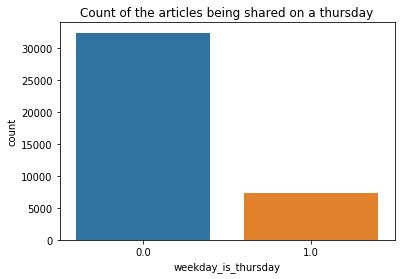

In [96]:
sns.countplot(data.weekday_is_thursday)
plt.title("Count of the articles being shared on a thursday")
plt.show()

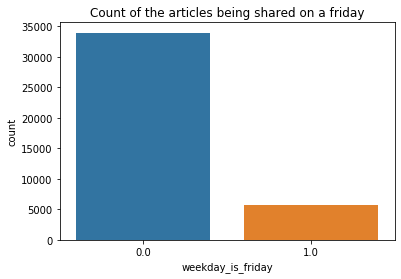

In [97]:
sns.countplot(data.weekday_is_friday)
plt.title("Count of the articles being shared on a friday")
plt.show()

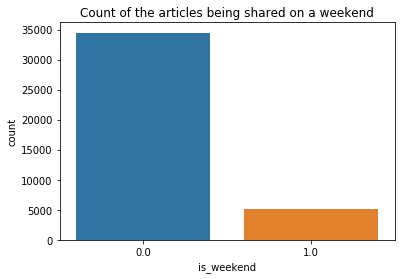

In [98]:
sns.countplot(data.is_weekend)
plt.title("Count of the articles being shared on a weekend")
plt.show()

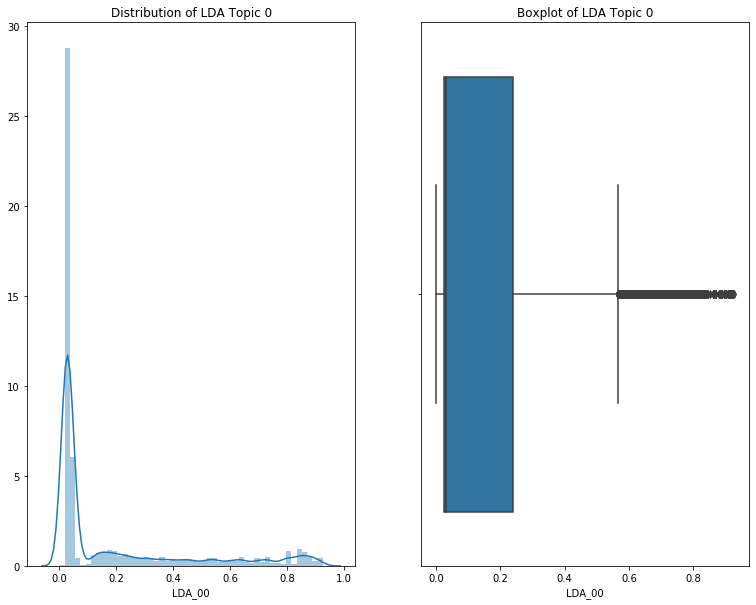

In [192]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_00)
plt.title("Distribution of LDA Topic 0")
plt.subplot(132)
sns.boxplot(data.LDA_00)
plt.title("Boxplot of LDA Topic 0")
plt.show()

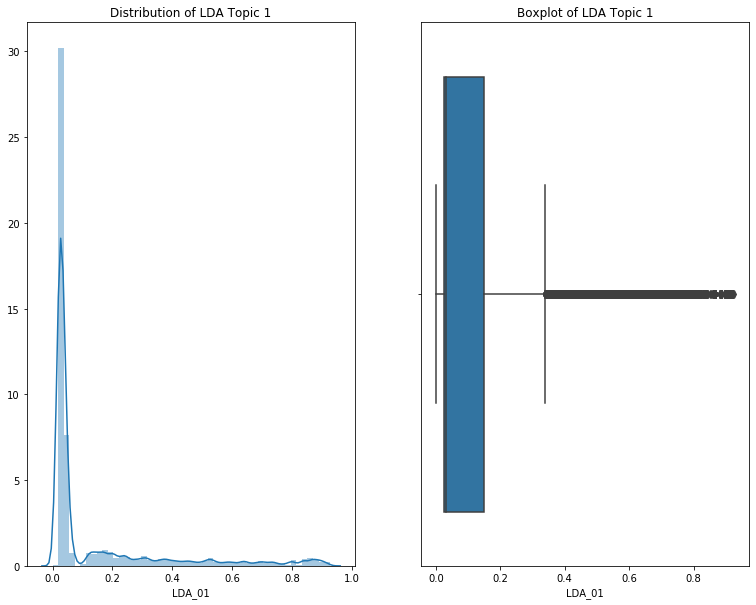

In [193]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_01)
plt.title("Distribution of LDA Topic 1")
plt.subplot(132)
sns.boxplot(data.LDA_01)
plt.title("Boxplot of LDA Topic 1")
plt.show()

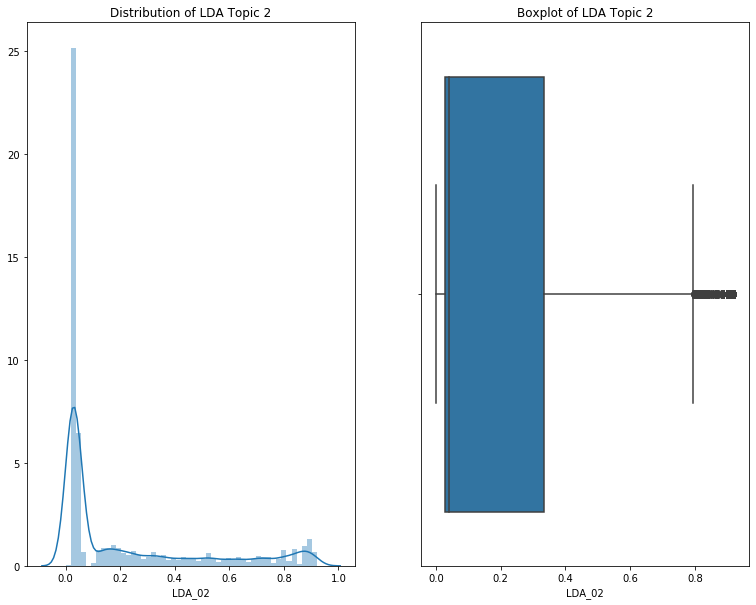

In [194]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_02)
plt.title("Distribution of LDA Topic 2")
plt.subplot(132)
sns.boxplot(data.LDA_02)
plt.title("Boxplot of LDA Topic 2")
plt.show()

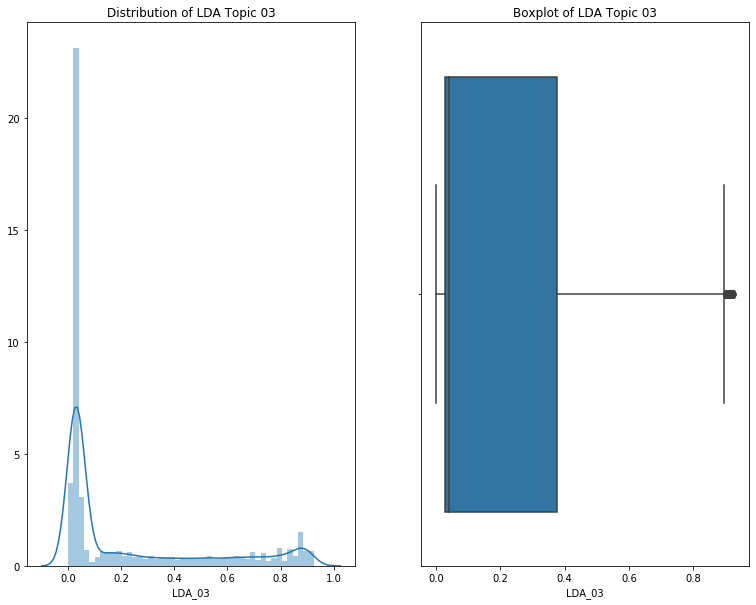

In [195]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_03)
plt.title("Distribution of LDA Topic 03")
plt.subplot(132)
sns.boxplot(data.LDA_03)
plt.title("Boxplot of LDA Topic 03")
plt.show()

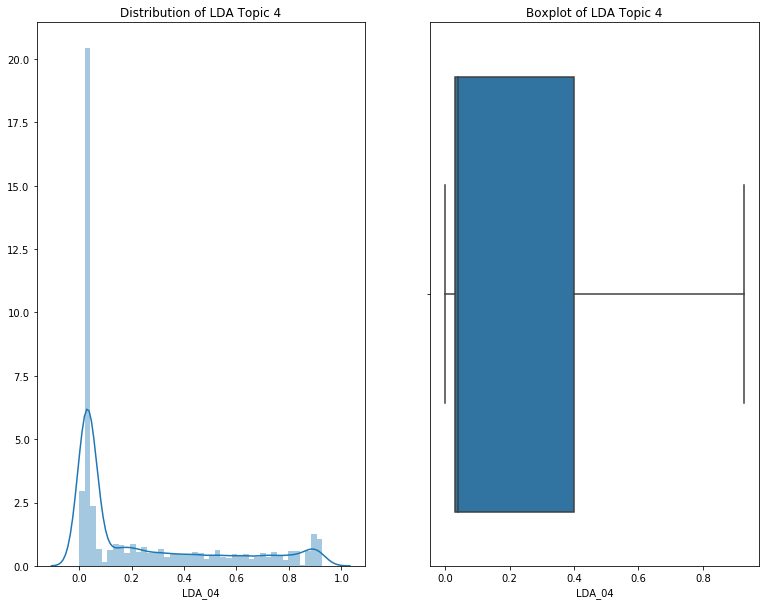

In [196]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_04)
plt.title("Distribution of LDA Topic 4")
plt.subplot(132)
sns.boxplot(data.LDA_04)
plt.title("Boxplot of LDA Topic 4")
plt.show()

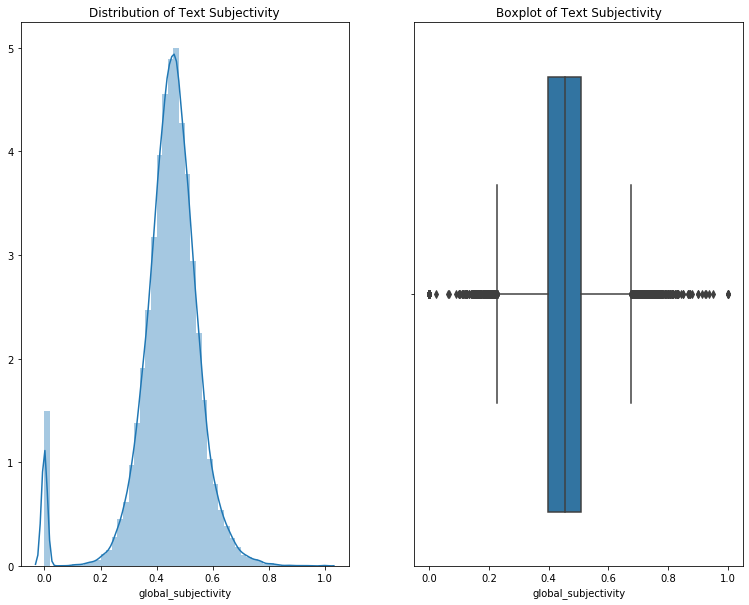

In [197]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_subjectivity)
plt.title("Distribution of Text Subjectivity")
plt.subplot(132)
sns.boxplot(data.global_subjectivity)
plt.title("Boxplot of Text Subjectivity")
plt.show()

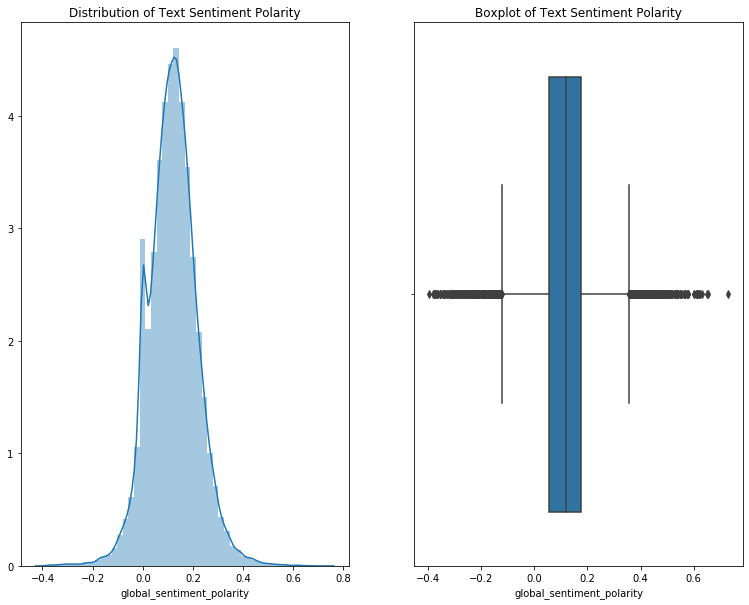

In [198]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_sentiment_polarity)
plt.title("Distribution of Text Sentiment Polarity")
plt.subplot(132)
sns.boxplot(data.global_sentiment_polarity)
plt.title("Boxplot of Text Sentiment Polarity")
plt.show()

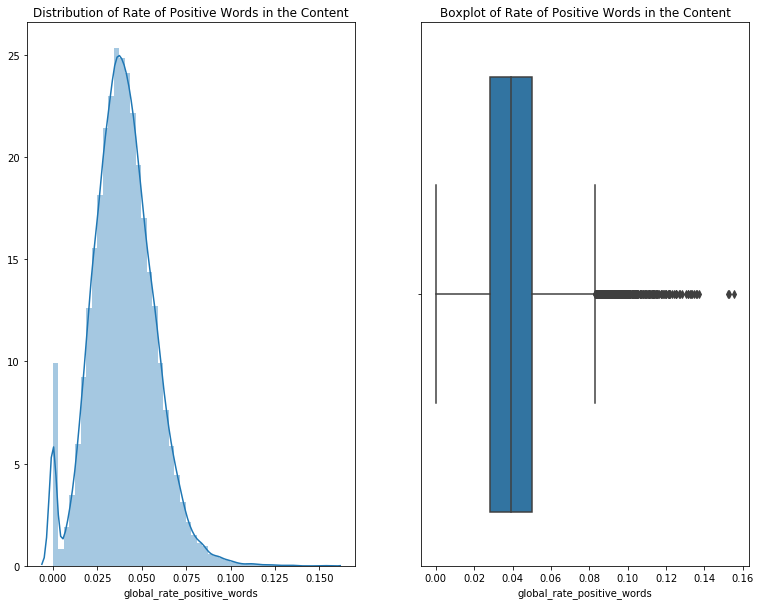

In [199]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_rate_positive_words)
plt.title("Distribution of Rate of Positive Words in the Content")
plt.subplot(132)
sns.boxplot(data.global_rate_positive_words)
plt.title("Boxplot of Rate of Positive Words in the Content")
plt.show()

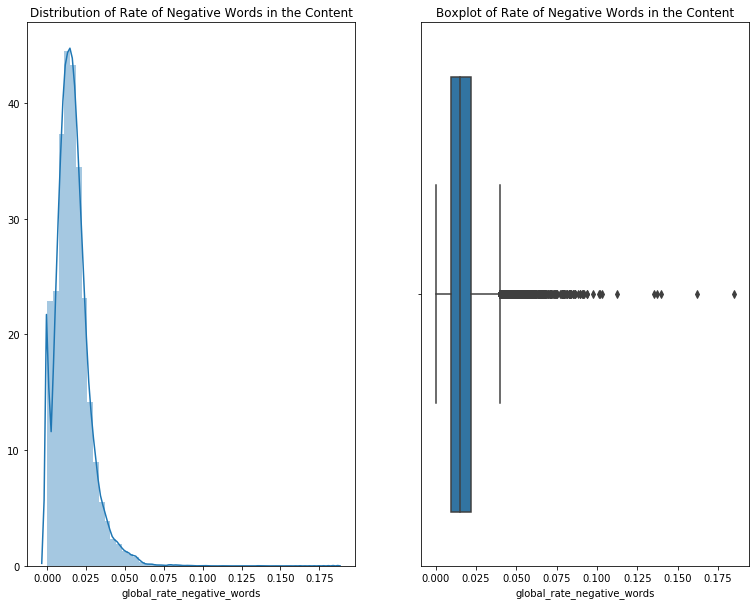

In [200]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_rate_negative_words)
plt.title("Distribution of Rate of Negative Words in the Content")
plt.subplot(132)
sns.boxplot(data.global_rate_negative_words)
plt.title("Boxplot of Rate of Negative Words in the Content")
plt.show()

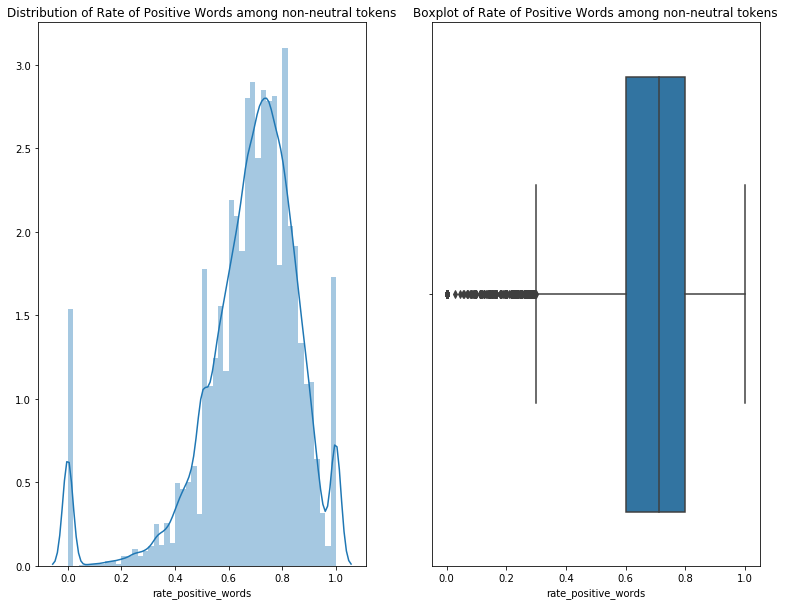

In [201]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.rate_positive_words)
plt.title("Distribution of Rate of Positive Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(data.rate_positive_words)
plt.title("Boxplot of Rate of Positive Words among non-neutral tokens")
plt.show()

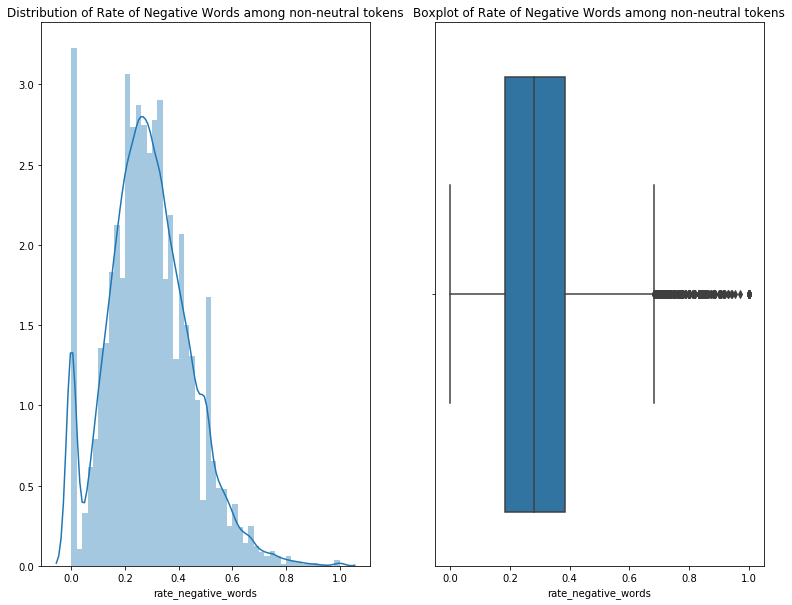

In [202]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.rate_negative_words)
plt.title("Distribution of Rate of Negative Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(data.rate_negative_words)
plt.title("Boxplot of Rate of Negative Words among non-neutral tokens")
plt.show()

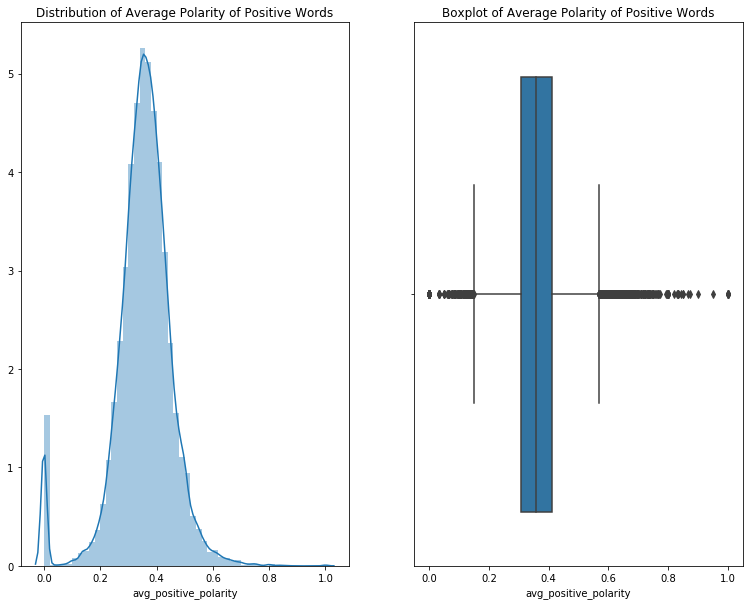

In [203]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.avg_positive_polarity)
plt.title("Distribution of Average Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.avg_positive_polarity)
plt.title("Boxplot of Average Polarity of Positive Words")
plt.show()

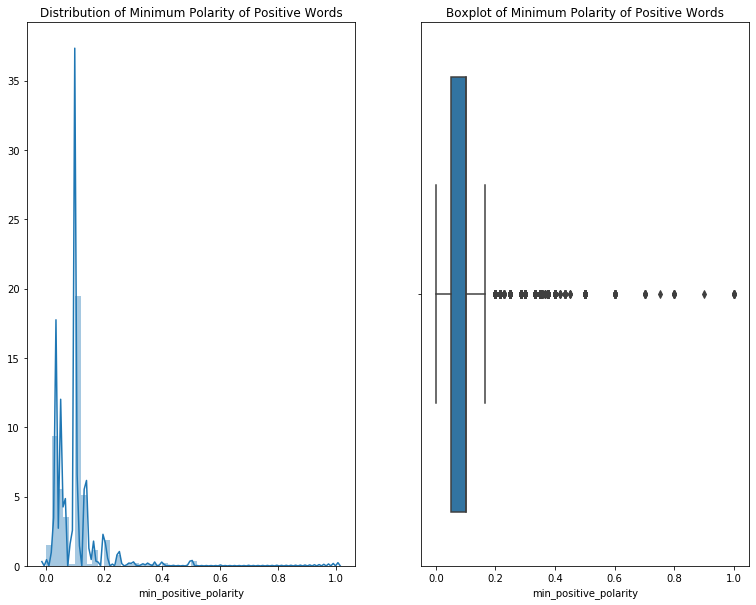

In [204]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.min_positive_polarity)
plt.title("Distribution of Minimum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.min_positive_polarity)
plt.title("Boxplot of Minimum Polarity of Positive Words")
plt.show()

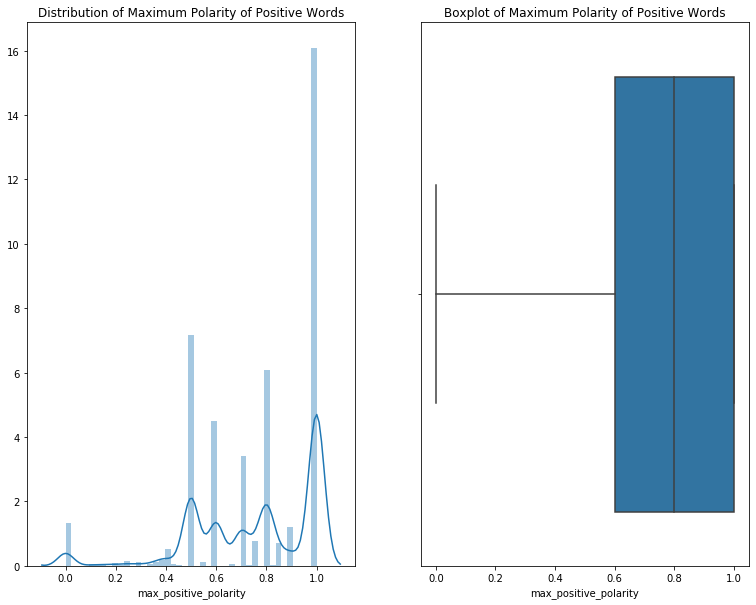

In [206]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.max_positive_polarity)
plt.title("Distribution of Maximum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.max_positive_polarity)
plt.title("Boxplot of Maximum Polarity of Positive Words")
plt.show()

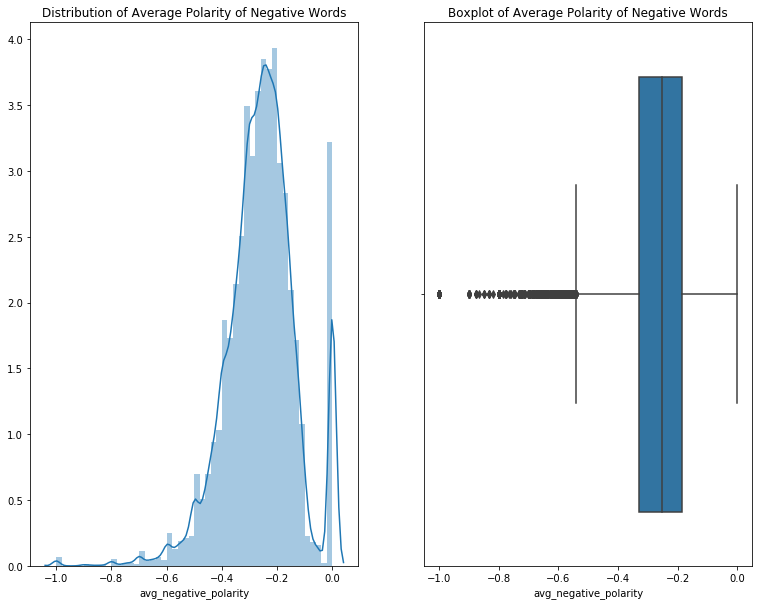

In [207]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.avg_negative_polarity)
plt.title("Distribution of Average Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.avg_negative_polarity)
plt.title("Boxplot of Average Polarity of Negative Words")
plt.show()

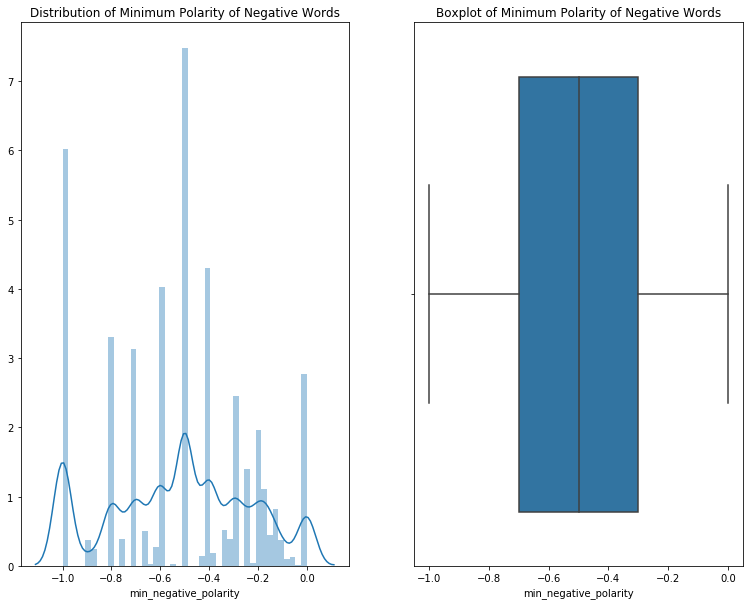

In [208]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.min_negative_polarity)
plt.title("Distribution of Minimum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.min_negative_polarity)
plt.title("Boxplot of Minimum Polarity of Negative Words")
plt.show()

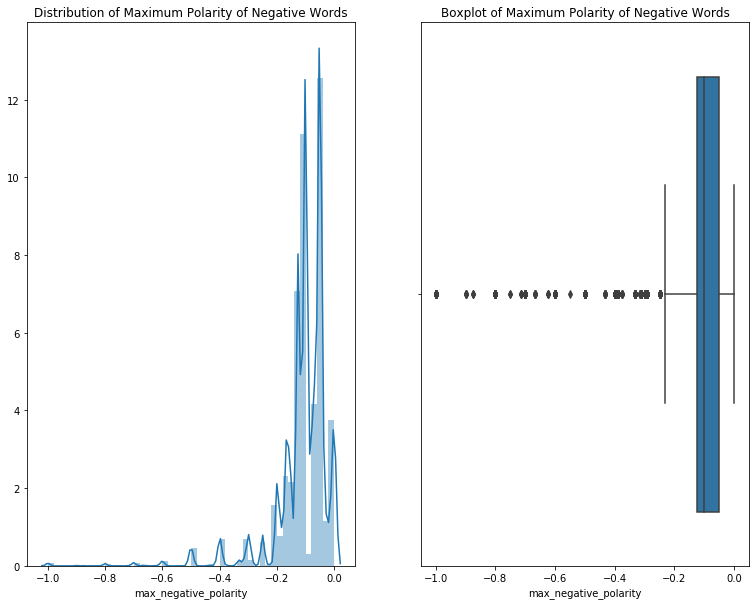

In [209]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.max_negative_polarity)
plt.title("Distribution of Maximum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.max_negative_polarity)
plt.title("Boxplot of Maximum Polarity of Negative Words")
plt.show()

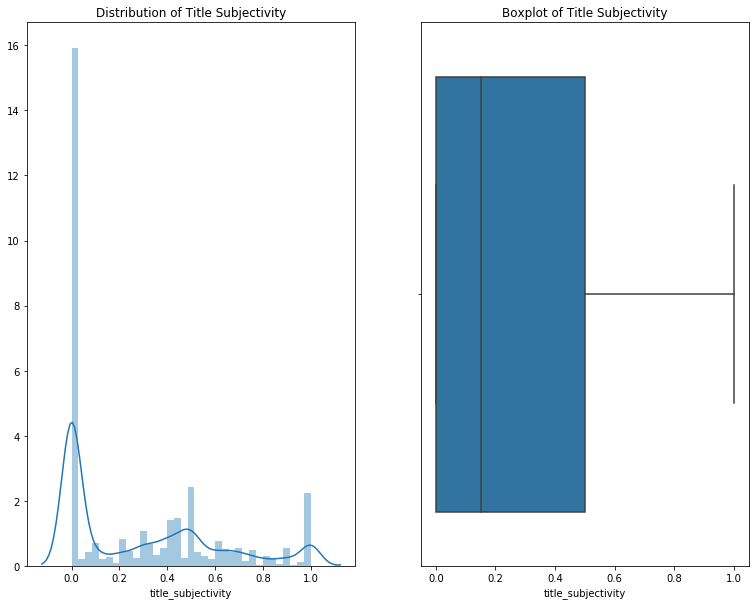

In [210]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.title_subjectivity)
plt.title("Distribution of Title Subjectivity")
plt.subplot(132)
sns.boxplot(data.title_subjectivity)
plt.title("Boxplot of Title Subjectivity")
plt.show()

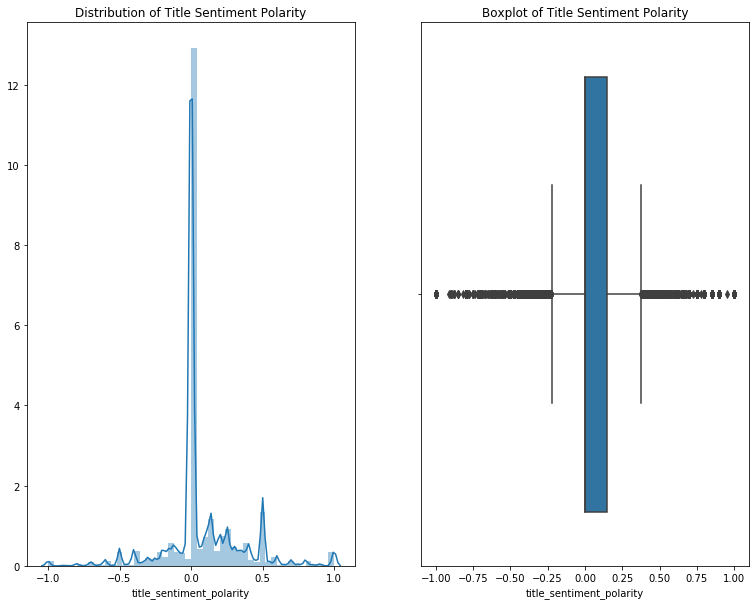

In [211]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.title_sentiment_polarity)
plt.title("Distribution of Title Sentiment Polarity")
plt.subplot(132)
sns.boxplot(data.title_sentiment_polarity)
plt.title("Boxplot of Title Sentiment Polarity")
plt.show()

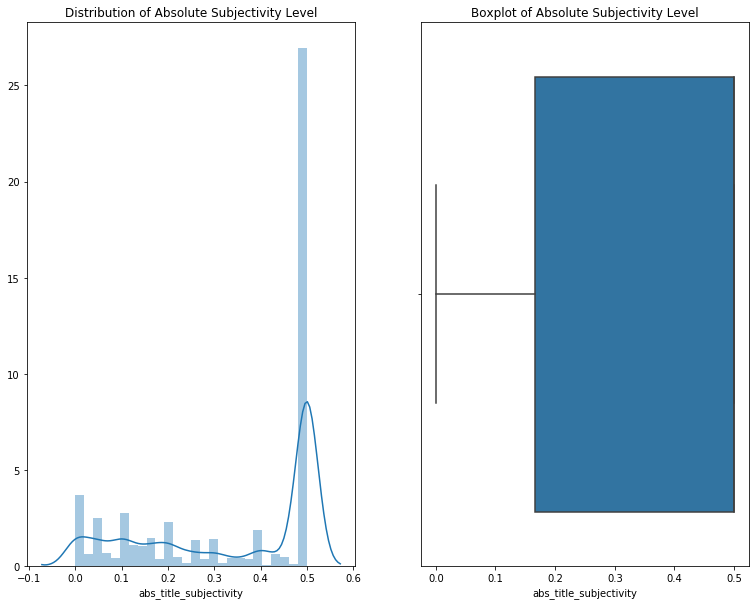

In [212]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.abs_title_subjectivity)
plt.title("Distribution of Absolute Subjectivity Level")
plt.subplot(132)
sns.boxplot(data.abs_title_subjectivity)
plt.title("Boxplot of Absolute Subjectivity Level")
plt.show()

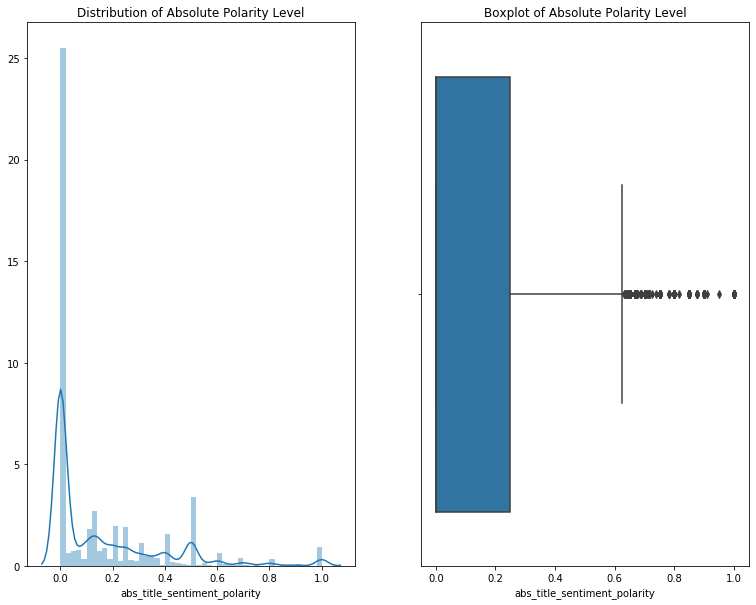

In [213]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.abs_title_sentiment_polarity)
plt.title("Distribution of Absolute Polarity Level")
plt.subplot(132)
sns.boxplot(data.abs_title_sentiment_polarity)
plt.title("Boxplot of Absolute Polarity Level")
plt.show()

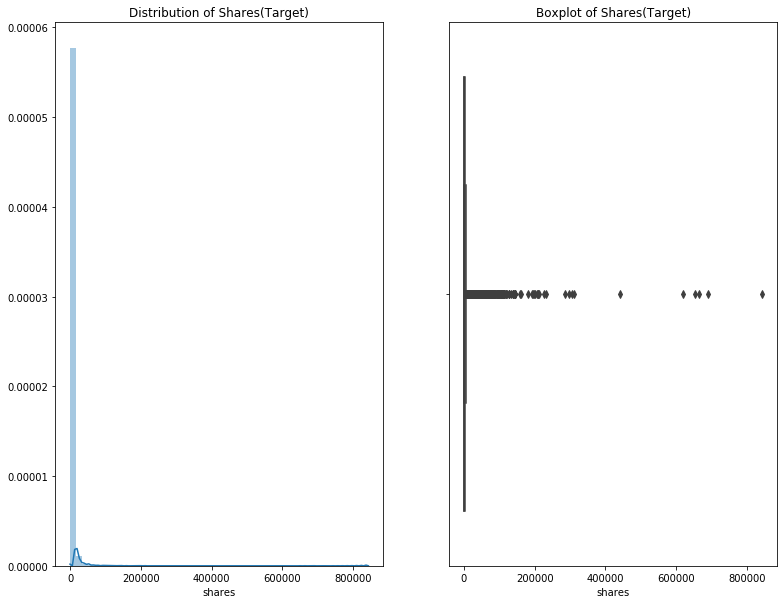

In [214]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.shares)
plt.title("Distribution of Shares(Target)")
plt.subplot(132)
sns.boxplot(data.shares)
plt.title("Boxplot of Shares(Target)")
plt.show()

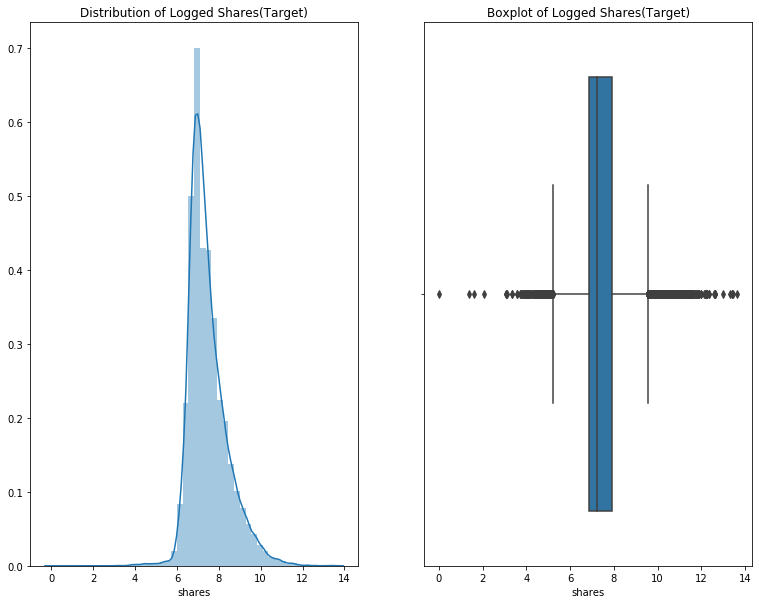

In [215]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(np.log(data.shares))
plt.title("Distribution of Logged Shares(Target)")
plt.subplot(132)
sns.boxplot(np.log(data.shares))
plt.title("Boxplot of Logged Shares(Target)")
plt.show()

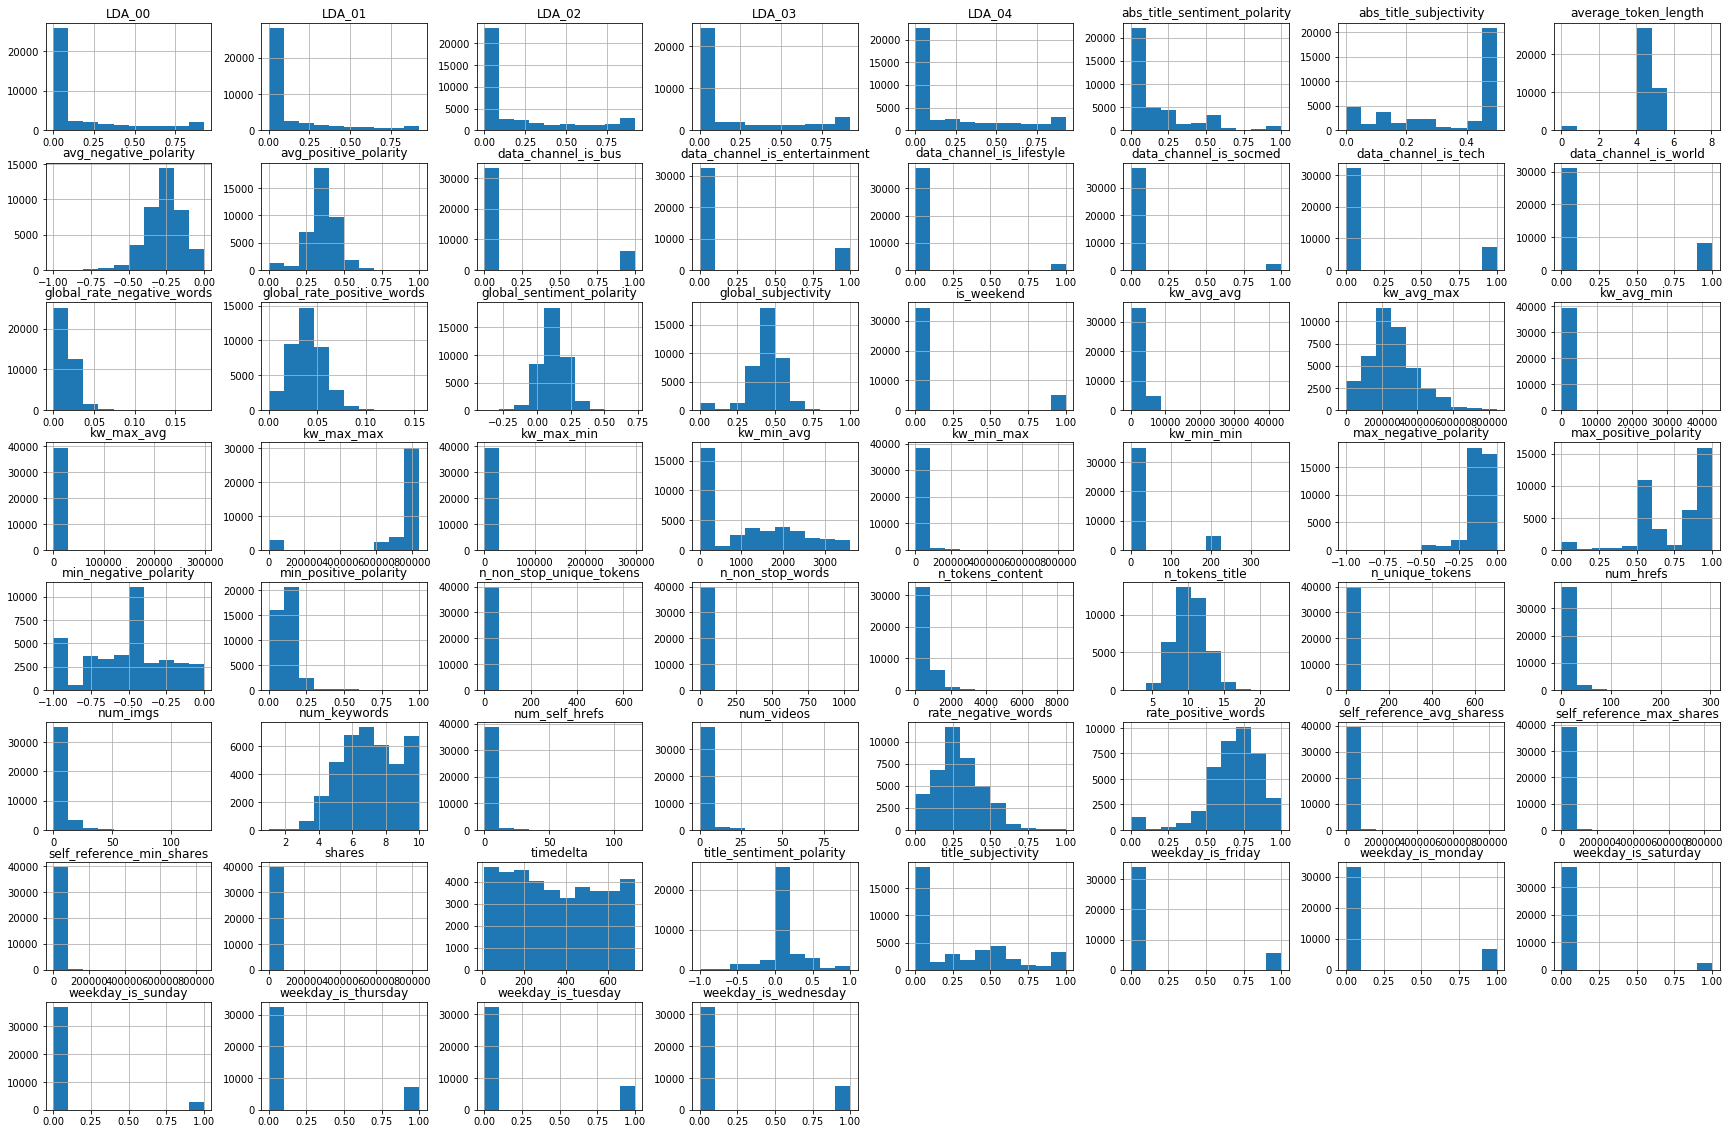

<Figure size 432x288 with 0 Axes>

In [122]:
data.hist(figsize=[30,20])
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

<Figure size 2880x2160 with 0 Axes>

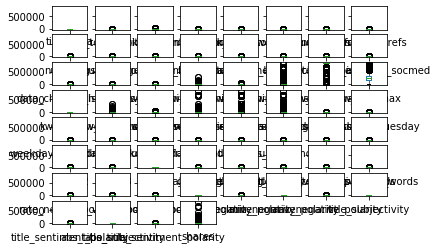

<Figure size 432x288 with 0 Axes>

In [123]:
plt.close("all")
plt.figure(figsize=[40,30])
data.plot(kind="box",subplots=True,sharey=True,sharex=False,layout=(8,8))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

#### Bivariate Analysis

For Numerical vs Numerical - Scatterplot

For Categorical vs Numerical - Boxplot | Violinplot

For Categorical vs Categorical - pd.crosstab | Table | Barplot

In [216]:
plt.figure(figsize=[20,15])
sns.pairplot(data)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000000F24569EF28> (for post_execute):


KeyboardInterrupt: 

<Figure size 1440x1080 with 0 Axes>

Error in callback <function flush_figures at 0x000000F2456AD9D8> (for post_execute):


KeyboardInterrupt: 

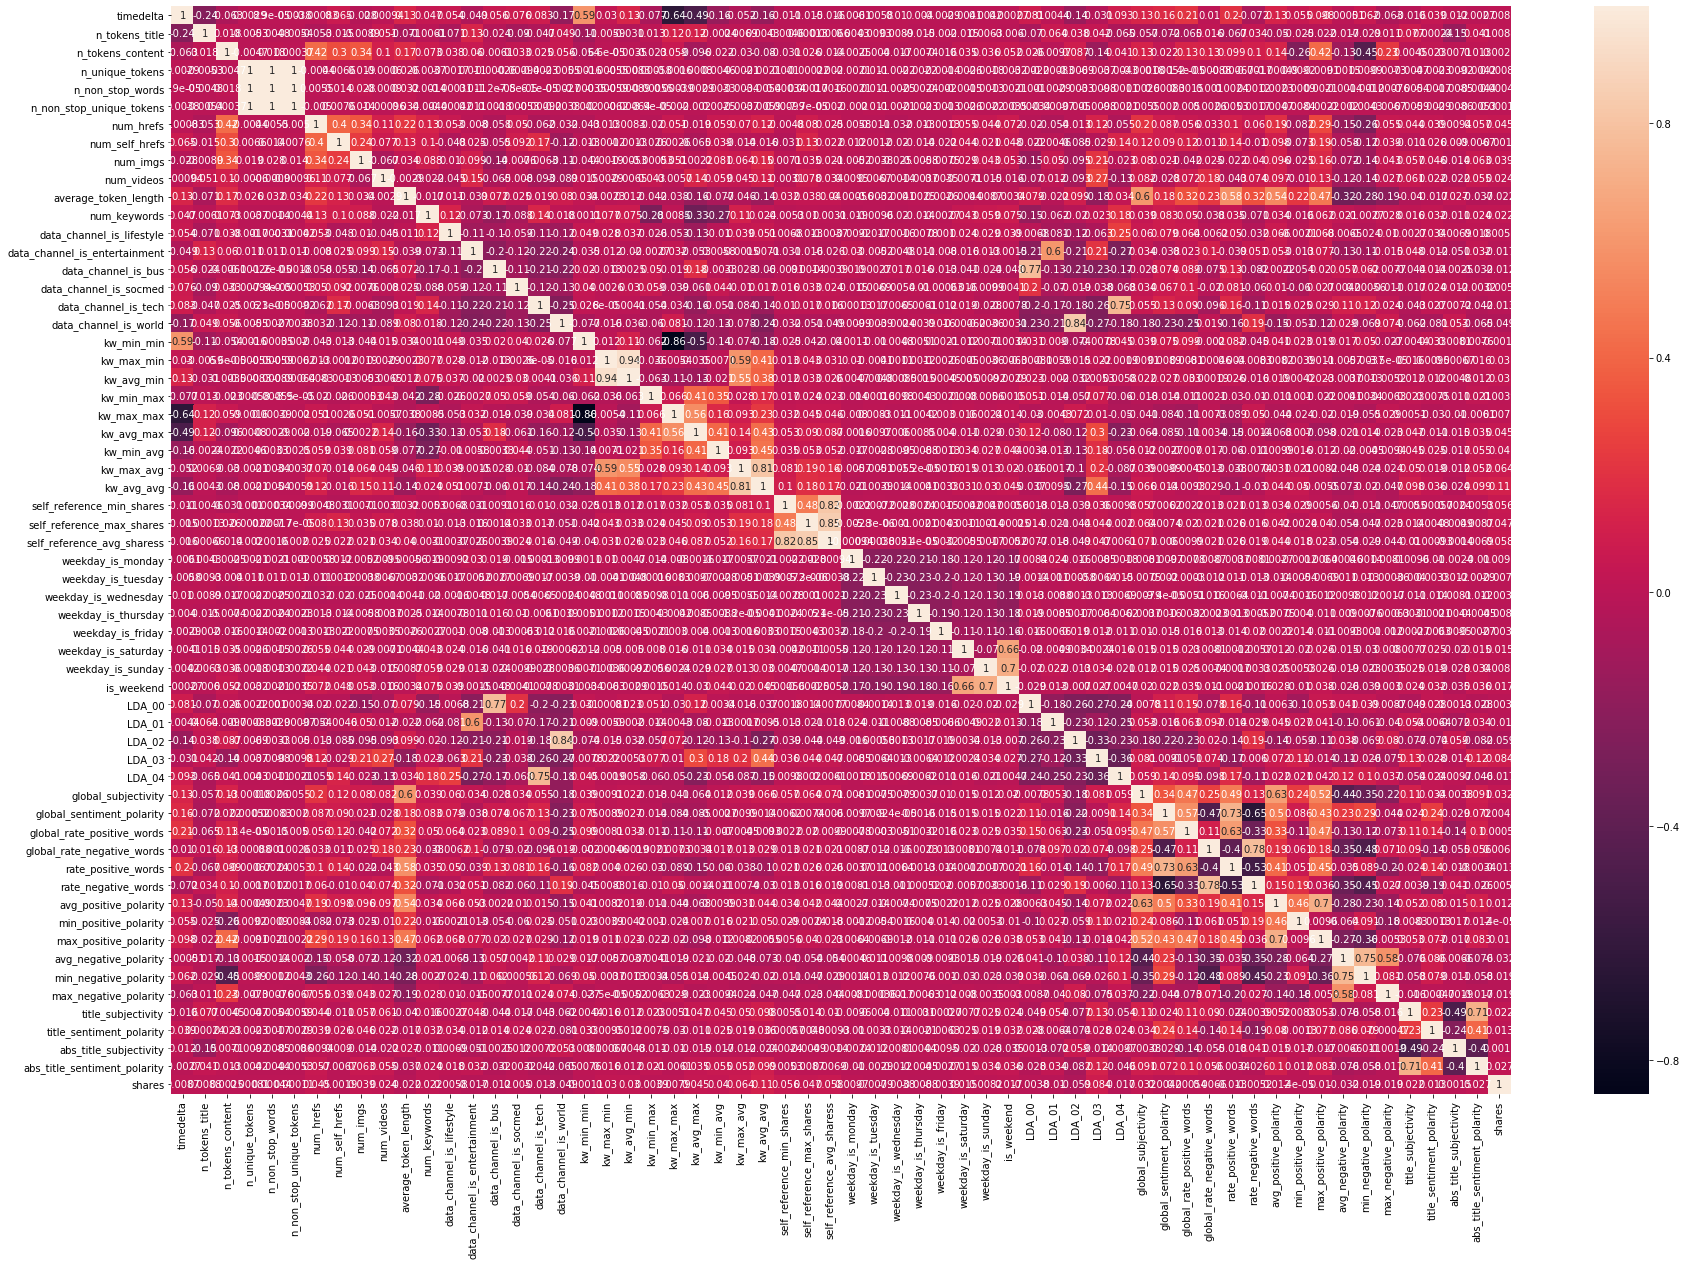

In [124]:
plt.figure(figsize=[30,20])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("n_tokens_title")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("n_tokens_content")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("n_unique_tokens")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("n_non_stop_words")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("n_non_stop_unique_tokens")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("num_imgs")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("num_videos")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
plt.figure(figsize=[15,10])
data.groupby("num_keywords")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_lifestyle")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_entertainment")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_bus")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_socmed")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_tech")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [ ]:
data.groupby("data_channel_is_world")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

In [125]:
data["data_channel_is_lifestyle"].value_counts()

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

In [126]:
data["data_channel_is_entertainment"].value_counts()

0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64

In [127]:
data["data_channel_is_socmed"].value_counts()

0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64

In [128]:
data["data_channel_is_bus"].value_counts()

0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64

In [129]:
data["data_channel_is_tech"].value_counts()

0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64

In [130]:
data["data_channel_is_world"].value_counts()

0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64

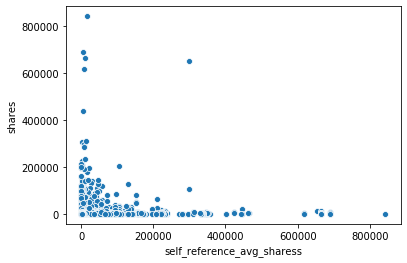

<Figure size 432x288 with 0 Axes>

In [131]:
sns.scatterplot(data.self_reference_avg_sharess,data.shares)
plt.show()
plt.tight_layout()

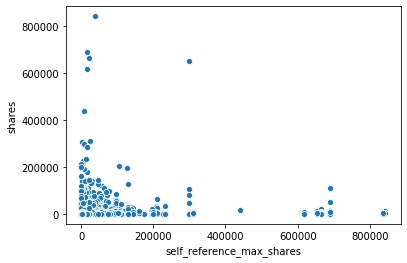

<Figure size 432x288 with 0 Axes>

In [132]:
sns.scatterplot(data.self_reference_max_shares,data.shares)
plt.show()
plt.tight_layout()

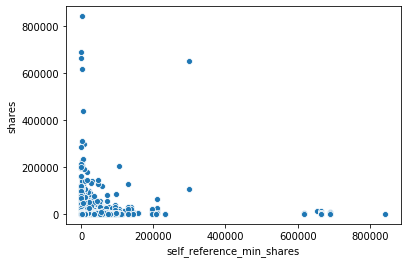

<Figure size 432x288 with 0 Axes>

In [133]:
sns.scatterplot(data.self_reference_min_shares,data.shares)
plt.show()
plt.tight_layout()

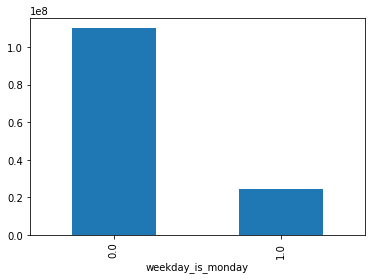

<Figure size 432x288 with 0 Axes>

In [134]:
data.groupby("weekday_is_monday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

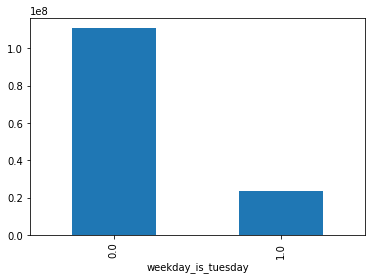

<Figure size 432x288 with 0 Axes>

In [135]:
data.groupby("weekday_is_tuesday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

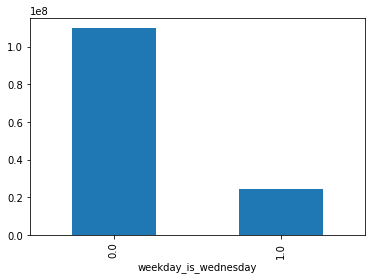

<Figure size 432x288 with 0 Axes>

In [136]:
data.groupby("weekday_is_wednesday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

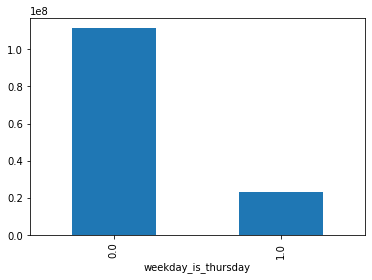

<Figure size 432x288 with 0 Axes>

In [137]:
data.groupby("weekday_is_thursday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

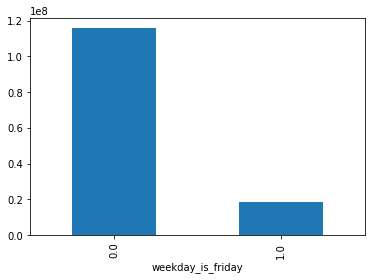

<Figure size 432x288 with 0 Axes>

In [138]:
data.groupby("weekday_is_friday")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

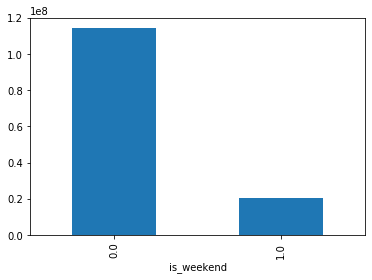

<Figure size 432x288 with 0 Axes>

In [139]:
data.groupby("is_weekend")["shares"].sum().plot("bar")
plt.show()
plt.tight_layout()

### Multiple Imputation by Chained Equations (MICE) for Outlier Treatment

In [48]:
imputed_data = mice(new_data)

C:\Users\Toshiba\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [68]:
imputed_data.columns

RangeIndex(start=0, stop=23, step=1)

In [69]:
imputed_data.columns = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']

In [70]:
imputed_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess'], dtype='object')

### Joined Data

In [71]:
df = data.join(imputed_data)
df.head()

url  timedelta  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000                    0.7              -0.350000                 -0.600              -0.200000            0.500000                 -0.187500                0.000000                      0.187500     593            12.0             219.0         0.663594               1.0                  0.815385        4.0        2.000000  1.000000         0.0              4.680365           5.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333                    0.7              -0.118750                 -0.125              -0.100000            0.000000                  0.000000                0.500000                      0.000000     711             9.0             255.0         0.604743               1.0                  0.791946        3.0        1.000000  1.000000         0.0              4.913725           4.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000                    1.0              -0.466667                 -0.800              -0.133333            0.000000                  0.000000                0.500000                      0.000000    1500             9.0             211.0         0.575130               1.0                  0.663866        3.0        1.000000  1.000000         0.0              4.393365           6.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0                        0.

In [50]:
df.isnull().sum().sum()

0

### Defining X and Y and performing a Train-Test Split

In [107]:
x = df.drop(["url","timedelta","shares"],axis=1)
y = df.shares
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


### Building different models and algorithms

#### Linear Regressor

In [108]:
lr = LinearRegression()

In [109]:
lr_pred = lr.fit(xtrain,ytrain).predict(xtest)

In [110]:
r2_score(ytest,lr_pred)

-67.51678526796331

In [111]:
training_accuracy = lr.score(xtrain,ytrain)
testing_accuracy = lr.score(xtest,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.022336289009577404
Testing Accuracy is: -67.51678526796331


In [112]:
np.sqrt(mean_squared_error(ytest,lr_pred))

72210.95489226327

#### Gradient Boosting Regressor

In [113]:
gbr = GradientBoostingRegressor()
gbr_pred = gbr.fit(xtrain,ytrain).predict(xtest)

In [114]:
training_accuracy = gbr.score(xtrain,ytrain)
testing_accuracy = gbr.score(xtest,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.42390015132000547
Testing Accuracy is: -0.2740389768018914


In [115]:
np.sqrt(mean_squared_error(ytest,gbr_pred))

9846.81902820525

### Checking Skewness

In [116]:
df.shares.skew()

33.96388487571415

In [117]:
np.log(df.shares).skew()

1.017799445530757

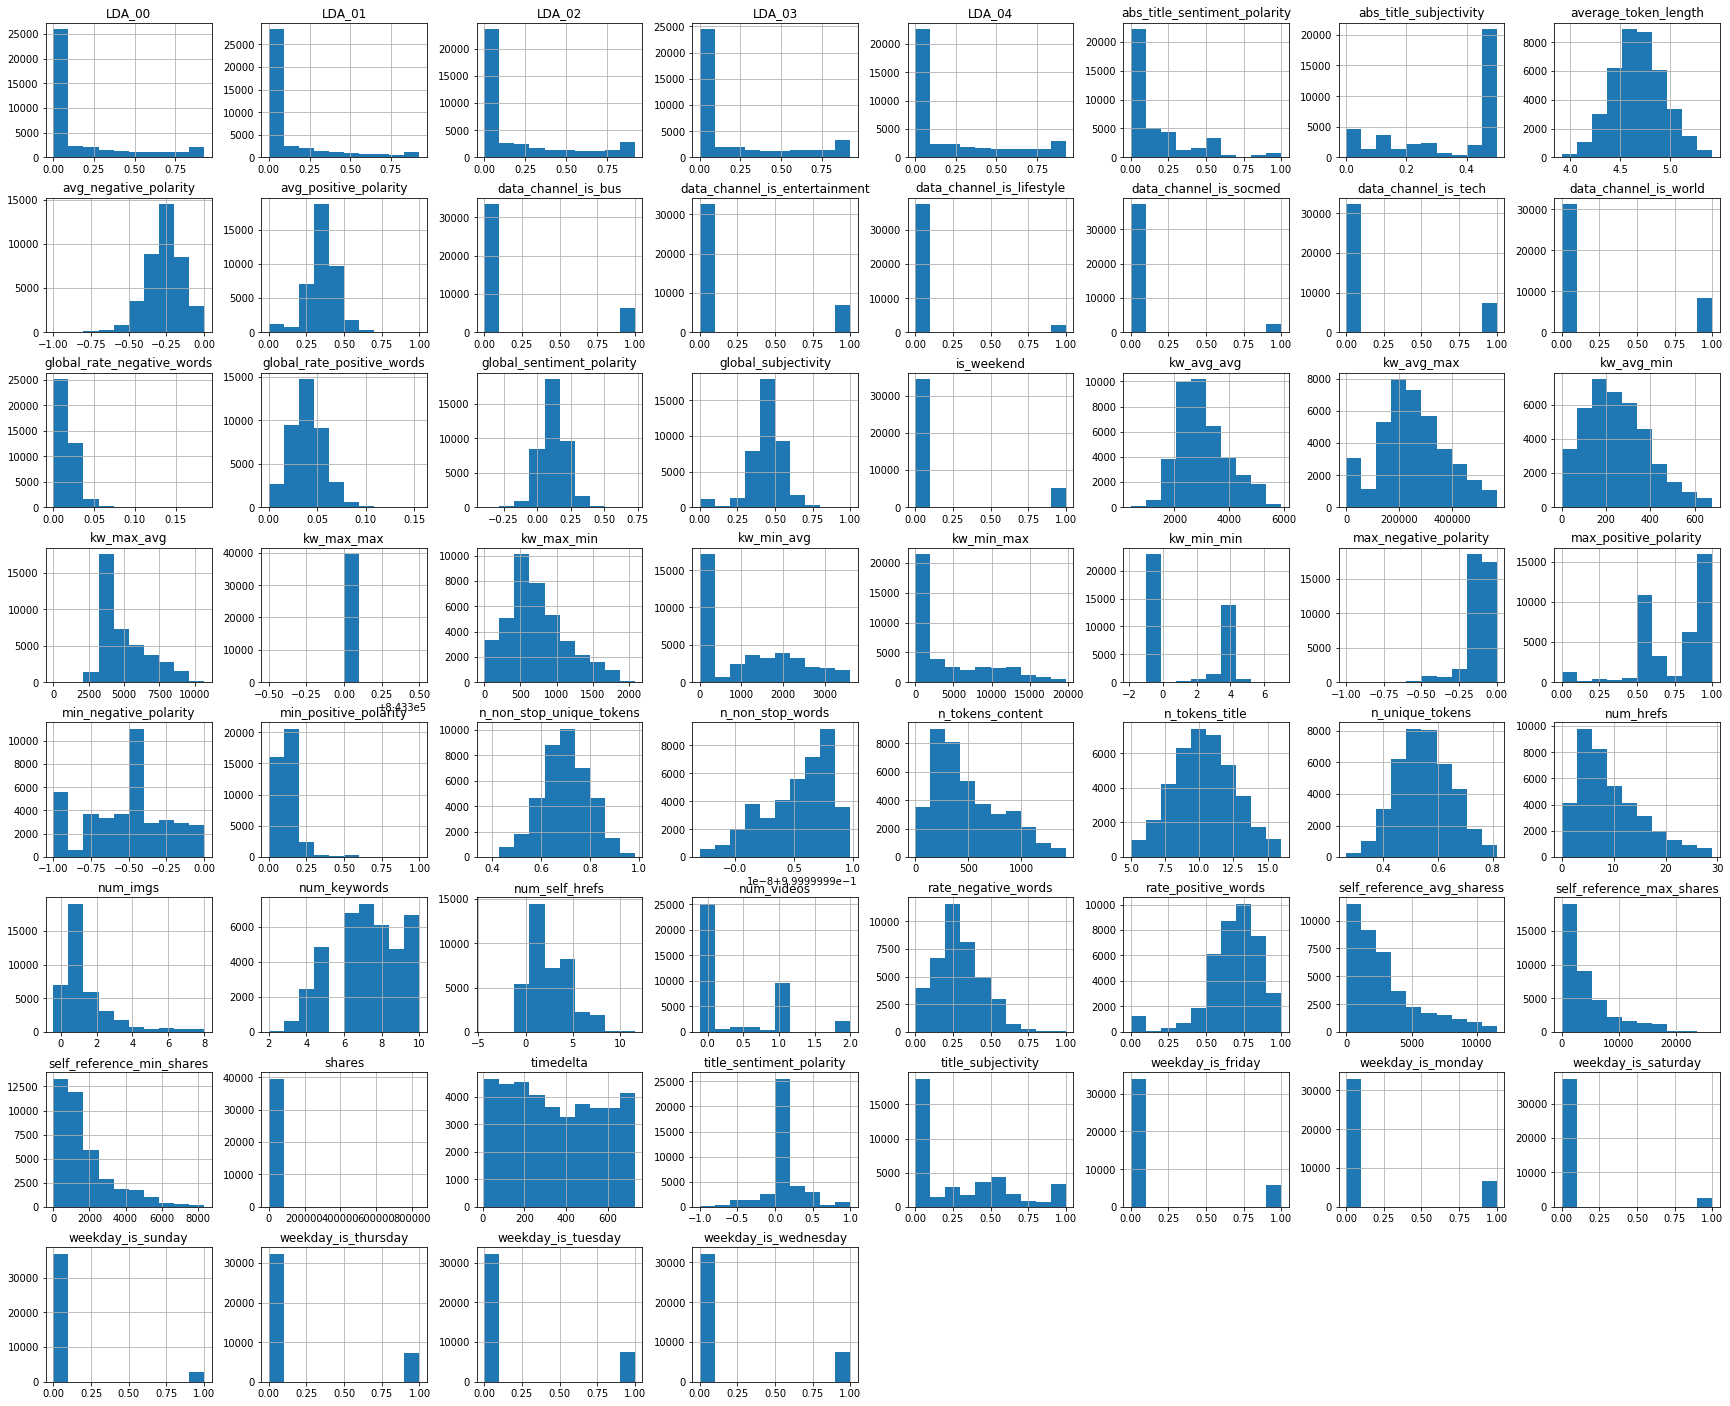

In [124]:
df.hist(figsize=[30,25]);

In [130]:
num_columns = df.columns[df.dtypes.isin(["float64","int64"])]

In [131]:
len(num_columns)

59

C:\Users\Toshiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Toshiba\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


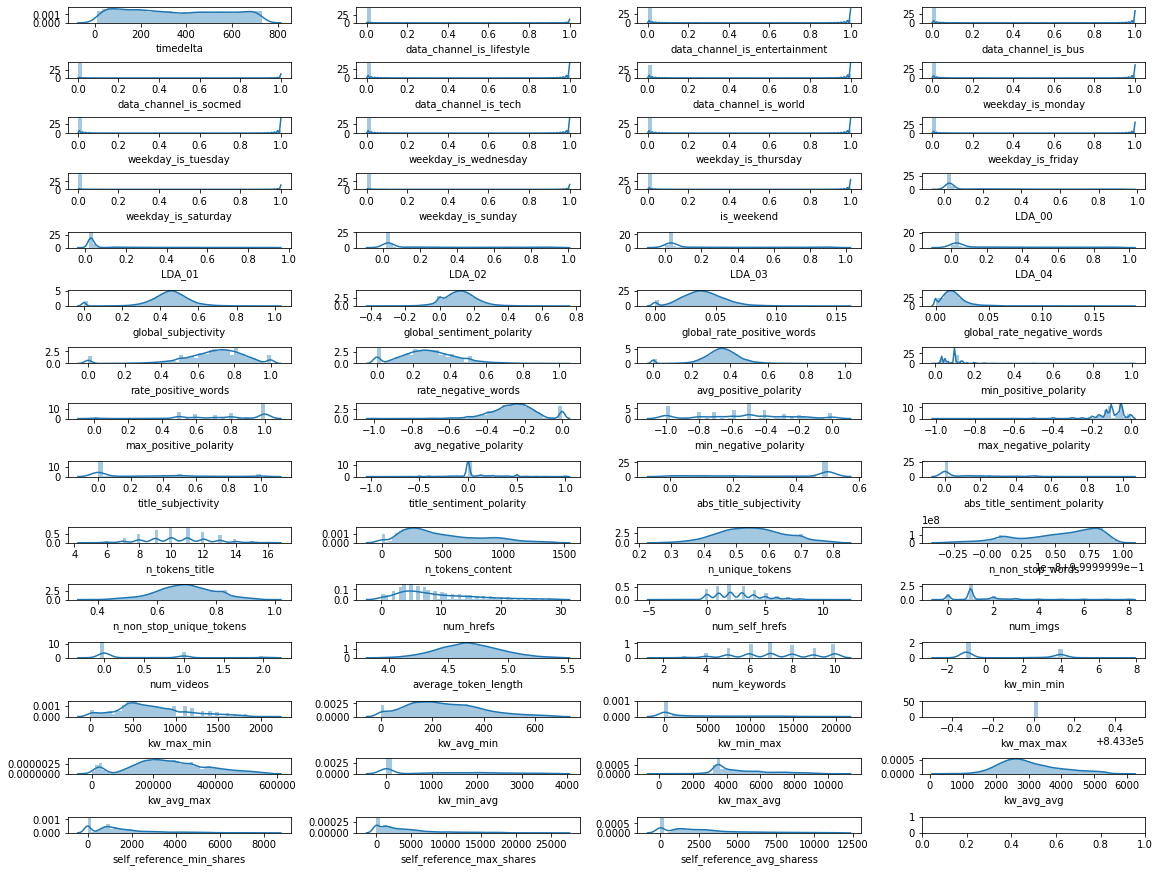

In [132]:
figs, axes = plt.subplots(15,4, figsize=(16,12), constrained_layout=True)
for col, ax in zip(num_columns, axes.flat):
    sns.distplot(df[col], ax=ax)
plt.show()

In [134]:
df[num_columns].skew().values

array([ 0.12050427,  3.99301914,  1.68358481,  1.87687019,  3.75887963,
        1.61997576,  1.40516938,  1.77590824,  1.61054706,  1.60097098,
        1.63707005,  2.03030484,  3.63708576,  3.39992738,  2.18850033,
        1.56746323,  2.08672182,  1.3116949 ,  1.23871599,  1.17312948,
       -1.37268883,  0.1054571 ,  0.32304661,  1.49191731, -1.42310585,
        0.40724065, -0.72479495,  3.04046774, -0.93975646, -0.55164403,
       -0.07315482, -3.45974706,  0.81608475,  0.39610884, -0.62414938,
        1.70419344,  0.10226566,  0.72193594,  0.09770841,  0.        ,
       -0.06761209,  0.93058893,  0.66577536,  2.26249097,  1.31485038,
        0.09887839, -0.11546683,  0.38039751,  0.58123285,  0.50790898,
        1.09508548,  0.        ,  0.19551246,  0.46797585,  0.87843691,
        0.57222024,  1.42041401,  1.53256457,  1.16536354])

In [141]:
pd.DataFrame({"Columns":num_columns, "Before Transformation":df[num_columns].skew().values,
              "After Transformation":np.power(df[num_columns],1/5).skew().values}).sort_values("Before Transformation")

C:\Users\Toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


Columns  Before Transformation  After Transformation
31          max_negative_polarity              -3.459747              0.000000
24            rate_positive_words              -1.423106             -4.886488
20            global_subjectivity              -1.372689             -5.084402
28          max_positive_polarity              -0.939756             -4.556839
26          avg_positive_polarity              -0.724795             -4.851322
34         abs_title_subjectivity              -0.624149             -2.346693
29          avg_negative_polarity              -0.551644              0.000000
46                   num_keywords              -0.115467             -0.562942
30          min_negative_polarity              -0.073155              0.000000
40       n_non_stop_unique_tokens              -0.067612             -0.392905
51                     kw_max_max               0.000000              0.000000
39               n_non_stop_words               0.000000              0.000000
38                n_unique_tokens               0.097708             -0.288584
45           average_token_length               0.098878             -0.023261
36                 n_tokens_title               0.102266             -0.339025
21      global_sentiment_polarity               0.105457             -2.590535
0                       timedelta               0.120504             -0.780235
52                     kw_avg_max               0.195512             -1.914839
22     global_rate_positive_words               0.323047             -3.905423
47                     kw_min_min               0.380398            -10.604930
33       title_sentiment_polarity               0.396109              0.479128
25            rate_negative_words               0.407241             -2.793369
53                     kw_min_avg               0.467976             -0.225973
49                     kw_avg_min               0.507909             -1.493512
55                     kw_avg_avg               0.572220             -0.149456
48                     kw_max_min               0.581233             -2.925791
42                 num_self_hrefs               0.665775             -1.716198
37               n_tokens_content               0.721936             -2.652781
32             title_subjectivity               0.816085             -0.091540
54                     kw_max_avg               0.878437             -3.668005
41                      num_hrefs               0.930589             -2.391875
50                     kw_min_max               1.095085             -0.089882
58     self_reference_avg_sharess               1.165364             -1.258494
19                         LDA_04               1.173129              0.579474
18                         LDA_03               1.238716              0.731850
17                         LDA_02               1.311695              0.696542
44                     num_videos               1.314850              0.584966
6           data_channel_is_world               1.405169              1.405169
56      self_reference_min_shares               1.420414             -1.255132
23     global_rate_negative_words               1.491917             -2.562833
57      self_reference_max_shares               1.532565             -1.106264
15                         LDA_00               1.567463              0.938139
9            weekday_is_wednesday               1.600971              1.600971
8              weekday_is_tuesday               1.610547              1.610547
5            data_channel_is_tech               1.619976              1.619976
10            weekday_is_thursday               1.637070              1.637070
2   data_channel_is_entertainment               1.683585              1.683585
35   abs_title_sentiment_polarity               1.704193              0.155185
7               weekday_is_monday               1.775908              1.775908
3             data_channel_is_bus               1.876870              1.8768

### Models after using Standard Scaler

In [142]:
ss = StandardScaler()

In [143]:
xtrain_scaled=ss.fit_transform(xtrain)

In [144]:
xtest_scaled = ss.transform(xtest)

In [145]:
gbr = GradientBoostingRegressor(random_state=0)

In [147]:
gbr_pred = gbr.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [148]:
training_accuracy = gbr.score(xtrain_scaled,ytrain)
testing_accuracy = gbr.score(xtest_scaled,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.4243753679089728
Testing Accuracy is: -0.4569222558487702


In [149]:
np.sqrt(mean_squared_error(ytest,gbr_pred))

10529.864622849916

In [150]:
! pip install xgboost

In [151]:
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier

In [152]:
xgb = XGBRegressor(random_state=0)

In [153]:
xgb_pred = xgb.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

C:\Users\Toshiba\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [154]:
np.sqrt(mean_squared_error(ytest,xgb_pred))

9377.700693967663

### Logged Target Models

In [324]:
df["logged_shares"]=np.log(df.shares)

In [325]:
x = df.drop(["url","timedelta","logged_shares","shares","Shares_Category"],axis=1)
y = df.logged_shares
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [326]:
SS = StandardScaler()

In [327]:
SCALED_XTRAIN = SS.fit_transform(xtrain)

In [328]:
SCALED_XTEST= SS.transform(xtest)

In [323]:
df.columns

Index(['url', 'timedelta', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
      

In [330]:
LR = LinearRegression()
LR_Predict = LR.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

In [331]:
inverse_LR_Predict = np.exp(LR_Predict)

In [332]:
np.sqrt(mean_squared_error(ytest,inverse_LR_Predict))

1981.7681398414034

In [336]:
r2_score(ytest,LR_Predict)

-13732020438761.74

In [ ]:
## Shapiro Wilk Test - Normality Check

In [340]:
from scipy.stats import shapiro

In [341]:
alpha = 0.05

In [ ]:
teststats,pvalue = shapiro(residual)
print("testsstats:",teststats)
print("pvalue:",pvalue)

In [ ]:
if (pvalue>alpha):
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

#### XGBoost Regressor

In [166]:
xgb = XGBRegressor(random_state=0)

In [167]:
xgb_pred = xgb.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

C:\Users\Toshiba\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:38:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [168]:
inverse_transformed = np.exp(xgb_pred)
inverse_transformed

array([1072.3096, 1660.8256, 2348.59  , ..., 2410.6943, 1102.7126,
       1993.0001], dtype=float32)

In [169]:
np.sqrt(mean_squared_error(ytest,inverse_transformed))

1969.9567987453954

In [176]:
print(round(r2_score(ytest,xgb_pred)*100),"%")

15.0 %


#### Random Forest Regressor

In [185]:
rf = RandomForestRegressor(random_state=0)

In [186]:
rf_pred = rf.fit(SCALED_XTRAIN,ytrain).predict(SCALED_XTEST)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [187]:
training_accuracy = rf.score(xtrain_scaled,ytrain)
testing_accuracy = rf.score(xtest_scaled,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",testing_accuracy)

Training Accuracy is: 0.8309968608608292
Testing Accuracy is: 0.047730804647394647


In [190]:
INVERSE_TRANSFORMED = np.exp(rf_pred)
INVERSE_TRANSFORMED

array([1010.85391141, 2521.02853398, 2848.07237998, ..., 2389.61943337,
       1301.24865733, 2229.49105617])

In [191]:
np.sqrt(mean_squared_error(ytest,INVERSE_TRANSFORMED))

2311.318528554963

In [207]:
df.columns

Index(['url', 'timedelta', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
      

### OLS Regression Model

In [240]:
model = sm.OLS(df.shares,df.drop(["logged_shares","shares","url","timedelta","LDA_00","LDA_03","data_channel_is_tech","data_channel_is_bus","data_channel_is_socmed","data_channel_is_lifestyle","data_channel_is_world","LDA_01","LDA_04","global_sentiment_polarity","global_rate_negative_words","avg_positive_polarity","avg_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","title_subjectivity","title_sentiment_polarity","n_tokens_content","n_unique_tokens","abs_title_subjectivity","abs_title_sentiment_polarity","num_imgs","average_token_length","num_keywords","kw_max_min","kw_avg_min","kw_min_max","kw_max_avg","self_reference_min_shares","self_reference_max_shares"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     36.98
Date:                Fri, 25 Oct 2019   Prob (F-statistic):          6.58e-170
Time:                        01:08:23   Log-Likelihood:            -4.2692e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39619   BIC:                         8.541e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
data_channel_is_entertainment  -896.1209    161.344     -5.554      0.000   -1212.359    -579.883
weekday_is_monday             -1.774e+07   3.64e+06     -4.879      0.000   -2.49e+07   -1.06e+07
weekday_is_tuesday            -1.774e+07   3.64e+06     -4.879      0.000   -2.49e+07   -1.06e+07
weekday_is_wednesday          -1.774e+07   3.64e+06     -4.879      0.000   -2.49e+07   -1.06e+07
weekday_is_thursday           -1.774e+07   3.64e+06     -4.879      0.000   -2.49e+07   -1.06e+07
weekday_is_friday             -1.774e+07   3.64e+06     -4.879      0.000   -2.49e+07   -1.06e+07
weekday_is_saturday           -5.918e+06   1.21e+06     -4.878      0.000    -8.3e+06   -3.54e+06
weekday_is_sunday             -5.918e+06   1.21e+06     -4.879      0.000    -8.3e+06   -3.54e+06
is_weekend                    -1.182e+07   2.42e+06     -4.879      0.000   -1.66e+07   -7.07e+06
LDA_02                         -924.0199    244.244     -3.783      0.000   -1402.744    -445.296
global_subjectivity            2837.3228    768.514      3.692      0.000    1331.018    4343.628
global_rate_positive_words    -1.205e+04   4754.909     -2.533      0.011   -2.14e+04   -2726.146
rate_positive_words           -1521.5723    570.954     -2.665      0.008   -2640.655    -402.490
rate_negative_words           -1812.5084    602.033     -3.011      0.003   -2992.508    -632.509
min_positive_polarity         -3418.5908    974.159     -3.509      0.000   -5327.965   -1509.216
min_negative_polarity         -1006.3343    277.139     -3.631      0.000   -1549.534    -463.134
n_tokens_title                   91.9575     29.122      3.158      0.002      34.877     149.038
n_non_stop_words              -1.681e+11   3.45e+10     -4.879      0.000   -2.36e+11   -1.01e+11
n_non_stop_unique_tokens      -2086.7531    875.918     -2.382      0.017   -3803.574    -369.932
num_hrefs                        70.0827     11.118      6.304      0.000      48.292      91.874
num_self_hrefs                 -163.3115     32.170     -5.076      0.000    -226.366    -100.257
num_videos                      855.1187    106.547      8.026      0.000     646.283    1063.954
kw_min_min                      104.3389     28.031      3.722      0.000      49.398     159.280
kw_max_max                     1.993e+05   4.09e+04      4.879      0.000    1.19e+05    2.79e+05
kw_avg_max                       -0.0014      0.001     -2.260      0.024      -0.003      -0.000
kw_min_avg                       -0.2279      0.063     -3.592      0.000      -0.352      -0.104
kw_avg_avg                        1.2414      0.099     12.565      0.000       1.048       1.435
self_reference_avg_sharess        0.2121      0.024      8.835      0.000       0.165       0.259
=============================================

In [269]:
model = sm.OLS(df.logged_shares,df.drop(["logged_shares","shares","url","timedelta"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logged_shares   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     112.8
Date:                Tue, 29 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:35:15   Log-Likelihood:                -50558.
No. Observations:               39644   AIC:                         1.012e+05
Df Residuals:                   39589   BIC:                         1.017e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
data_channel_is_lifestyle        -0.1454      0.030     -4.899      0.000      -0.204      -0.087
data_channel_is_entertainment    -0.2207      0.019    -11.647      0.000      -0.258      -0.184
data_channel_is_bus              -0.1867      0.029     -6.475      0.000      -0.243      -0.130
data_channel_is_socmed            0.0823      0.028      2.962      0.003       0.028       0.137
data_channel_is_tech              0.0529      0.028      1.896      0.058      -0.002       0.108
data_channel_is_world            -0.1148      0.028     -4.056      0.000      -0.170      -0.059
weekday_is_monday              1.181e+05   1.66e+04      7.124      0.000    8.56e+04    1.51e+05
weekday_is_tuesday             1.181e+05   1.66e+04      7.124      0.000    8.56e+04    1.51e+05
weekday_is_wednesday           1.181e+05   1.66e+04      7.124      0.000    8.56e+04    1.51e+05
weekday_is_thursday            1.181e+05   1.66e+04      7.124      0.000    8.56e+04    1.51e+05
weekday_is_friday              1.181e+05   1.66e+04      7.124      0.000    8.56e+04    1.51e+05
weekday_is_saturday             1.22e+05   1.71e+04      7.124      0.000    8.84e+04    1.56e+05
weekday_is_sunday               1.22e+05   1.71e+04      7.124      0.000    8.84e+04    1.56e+05
is_weekend                    -3855.4667    541.221     -7.124      0.000   -4916.273   -2794.660
LDA_00                           -1.1150      0.870     -1.281      0.200      -2.821       0.591
LDA_01                           -1.4638      0.870     -1.683      0.092      -3.169       0.241
LDA_02                           -1.5232      0.870     -1.751      0.080      -3.229       0.182
LDA_03                           -1.4401      0.870     -1.656      0.098      -3.145       0.265
LDA_04                           -1.3155      0.870     -1.512      0.131      -3.021       0.390
global_subjectivity               0.3735      0.064      5.830      0.000       0.248       0.499
global_sentiment_polarity        -0.1168      0.126     -0.929      0.353      -0.363       0.130
global_rate_positive_words       -1.1721      0.539     -2.175      0.030      -2.228      -0.116
global_rate_negative_words        0.7261      1.025      0.708      0.479      -1.284       2.736
rate_positive_words              -0.2992      0.051     -5.811      0.000      -0.400      -0.198
rate_negative_words              -0.4680      0.074     -6.354      0.000      -0.612      -0.324
avg_positive_polarity             0.0390      0.103      0.378      0.705      -0.163       0.241
min_positive_polarity            -0.3921      0.087     -4.510      0.000      -0.563      -0.222
max_positive_polarity             0.0129      0.033      0.390      0.696      -0.052       0.078
avg_negative_polarity            -0.1925     

#### Classification Problem

In [271]:
df.drop("logged_shares",axis=1,inplace=True)

In [273]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [274]:
bins = [0,1400,843300]
df["Shares_Category"] = pd.cut(df.shares,bins,labels=["Unpopular","Popular"])

In [277]:
df.head()

url  timedelta  data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world  weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  global_rate_positive_words  global_rate_negative_words  rate_positive_words  rate_negative_words  avg_positive_polarity  min_positive_polarity  max_positive_polarity  avg_negative_polarity  min_negative_polarity  max_negative_polarity  title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  abs_title_sentiment_polarity  shares  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0                        0.0                            1.0                  0.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.500331  0.378279  0.040005  0.041263  0.040123             0.521617                   0.092562                    0.045662                    0.013699             0.769231             0.230769               0.378636               0.100000                    0.7              -0.350000                 -0.600              -0.200000            0.500000                 -0.187500                0.000000                      0.187500     593            12.0             219.0         0.663594               1.0                  0.815385        4.0        2.000000  1.000000         0.0              4.680365           5.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.799756  0.050047  0.050096  0.050101  0.050001             0.341246                   0.148948                    0.043137                    0.015686             0.733333             0.266667               0.286915               0.033333                    0.7              -0.118750                 -0.125              -0.100000            0.000000                  0.000000                0.500000                      0.000000     711             9.0             255.0         0.604743               1.0                  0.791946        3.0        1.000000  1.000000         0.0              4.913725           4.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0                        0.0                            0.0                  1.0                     0.0                   0.0                    0.0                1.0                 0.0                   0.0                  0.0                0.0                  0.0                0.0         0.0  0.217792  0.033334  0.033351  0.033334  0.682188             0.702222                   0.323333                    0.056872                    0.009479             0.857143             0.142857               0.495833               0.100000                    1.0              -0.466667                 -0.800              -0.133333            0.000000                  0.000000                0.500000                      0.000000    1500             9.0             211.0         0.575130               1.0                  0.663866        3.0        1.000000  1.000000         0.0              4.393365           6.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0                        0.

#### Applying Classification Models 

In [347]:
X = df.drop(["Shares_Category","url","timedelta","shares"],axis=1)
Y = df.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [367]:
# scaling
SS = StandardScaler()

In [368]:
XTRAIN_SCALED=ss.fit_transform(XTRAIN)
XTEST_SCALED= ss.transform(XTEST)

In [399]:
rfc = RandomForestClassifier(random_state=123)

In [400]:
predict_rfc = rfc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [401]:
classificationreport = classification_report(YTEST,predict_rfc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.59      0.68      0.63      3874
   Unpopular       0.64      0.55      0.59      4055

    accuracy                           0.61      7929
   macro avg       0.62      0.61      0.61      7929
weighted avg       0.62      0.61      0.61      7929



In [402]:
accuracy = accuracy_score(YTEST,predict_rfc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6119308866187413


In [381]:
gbc = GradientBoostingClassifier(random_state=123)
predict_gbc = gbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [382]:
classificationreport = classification_report(YTEST,predict_gbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.66      0.65      0.65      3874
   Unpopular       0.67      0.67      0.67      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [383]:
accuracy = accuracy_score(YTEST,predict_gbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6636398032538782


In [ ]:
knn = KNeighborsClassifier()
predict_knn = knn.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [385]:
classificationreport = classification_report(YTEST,predict_knn)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.56      0.56      0.56      3874
   Unpopular       0.58      0.59      0.59      4055

    accuracy                           0.57      7929
   macro avg       0.57      0.57      0.57      7929
weighted avg       0.57      0.57      0.57      7929



In [386]:
accuracy = accuracy_score(YTEST,predict_knn)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.5742212132677513


In [387]:
dtc = DecisionTreeClassifier()
predict_dtc = dtc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [388]:
classificationreport = classification_report(YTEST,predict_dtc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.57      0.58      0.57      3874
   Unpopular       0.59      0.58      0.58      4055

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929



In [389]:
accuracy = accuracy_score(YTEST,predict_dtc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.5778786732248707


In [390]:
logreg = LogisticRegression()
predict_logreg = logreg.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [391]:
classificationreport = classification_report(YTEST,predict_logreg)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.64      0.62      0.63      3874
   Unpopular       0.65      0.67      0.66      4055

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [392]:
accuracy = accuracy_score(YTEST,predict_logreg)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6471181737924077


In [394]:
xgbc = XGBClassifier(random_state=123)
predict_xgbc = xgbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [395]:
classificationreport = classification_report(YTEST,predict_xgbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

     Popular       0.66      0.65      0.65      3874
   Unpopular       0.67      0.67      0.67      4055

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [396]:
accuracy = accuracy_score(YTEST,predict_xgbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6621263715474839


#### Grid Search - Gradient Boosting Classifier

In [363]:
X = df.drop(["Shares_Category","url","timedelta","shares","logged_shares"],axis=1)
Y = df.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [403]:
GBC = GradientBoostingClassifier(random_state=123)

In [404]:
params = {"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),
          "max_features":["log2","sqrt"], "criterion": ["friedman_mse","mae"],
          "subsample":[0.5, 0.8, 0.95, 1.0],"n_estimators":[10],
          'max_depth': [2,3,4,5,6,9]}
Grid_GBC = GridSearchCV(GBC, cv = 5,param_grid=params)
Grid_GBC.fit(XTRAIN_SCALED,YTRAIN)
print('Best Parameters using grid search:', Grid_GBC.best_params_)

KeyboardInterrupt: 